In [177]:
## Section for importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Livia 

In [88]:
#df = pd.read_csv('Healthcare_dataset.csv') #Tahsin

In [193]:
#upload CSV file of dataset
df = pd.read_csv('/Users/Olivia/Desktop/FinalProject/Healthcare_dataset.csv') #Livia
# Sammy's note - everyone just write your own read csv line so we can each work on the dataset,
# we'll delete it when we're done

In [194]:
#df = pd.read_csv("C:/Users/filto/Desktop/data_glacier/DataGlacierFinalProject/Healthcare_dataset.csv") #Sammy

In [90]:
#Taking count of rows and columns ## Livia
row_num = len(df.index) #number of rows
print("Number of rows: ", row_num)
col_num = len(df.columns) #number of columns
print("Number of columns: ", col_num)

Number of rows:  3424
Number of columns:  69


In [91]:
#information about the dataframe ## Livia
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [92]:
df.head() ##Livia

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [93]:
# Replace Column with a comma in the name
df.rename(columns = {'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx':'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx'}, inplace = True)

In [94]:
# Finding out how many different outputs there are for our data:

#Target Variable:
print("Persistency Flag:\n",df.Persistency_Flag.value_counts())
print("\n")

Persistency Flag:
 Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64




In [95]:
# Demographics
print("Gender:\n",df.Gender.value_counts())
print("\n")

print("Race:\n",df.Race.value_counts())
print("\n")

print("Ethnicity:\n",df.Ethnicity.value_counts())
print("\n")

print("Age:\n",df.Age_Bucket.value_counts())
print("\n")

print("Region:\n",df.Region.value_counts())
print("\n")

print("IDN Indicator:\n",df.Idn_Indicator.value_counts())
print("\n")

Gender:
 Female    3230
Male       194
Name: Gender, dtype: int64


Race:
 Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64


Ethnicity:
 Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64


Age:
 >75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64


Region:
 Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64


IDN Indicator:
 Y    2557
N     867
Name: Idn_Indicator, dtype: int64




In [96]:
# NTM
print("Physician's Specialty:\n", df.Ntm_Speciality.value_counts())
print("\n")

print("NTM Specialist Flag:\n",df.Ntm_Specialist_Flag.value_counts())
print("\n")

print("NTM Speciality_Bucket:\n",df.Ntm_Speciality_Bucket.value_counts())
print("\n")

Physician's Specialty:
 GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
HEMATOLOGY & ONCOLOGY                                               14
OTOLARYNGOLOGY                                                      14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                 

In [97]:
# row 2847
df[df["Ntm_Speciality"] == 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY']

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
2847,P2848,Non-Persistent,Female,Other/Unknown,Not Hispanic,Midwest,>75,OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETR...,Specialist,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [98]:
# row 1291
df[df["Ntm_Speciality"] == 'NEUROLOGY']

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
1291,P1292,Persistent,Female,Caucasian,Hispanic,South,55-65,NEUROLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


In [99]:
df[df["Ntm_Speciality"] == 'HEMATOLOGY & ONCOLOGY']

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
884,P885,Non-Persistent,Female,African American,Not Hispanic,South,>75,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,2
972,P973,Persistent,Female,Other/Unknown,Not Hispanic,South,55-65,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
1399,P1400,Persistent,Female,Caucasian,Not Hispanic,South,<55,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1734,P1735,Persistent,Male,Caucasian,Not Hispanic,Midwest,>75,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,Y,2
1841,P1842,Persistent,Female,Caucasian,Not Hispanic,Northeast,55-65,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,Y,N,N,N,N,N,N,4
2241,P2242,Persistent,Female,Caucasian,Not Hispanic,West,65-75,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
2523,P2524,Non-Persistent,Female,Caucasian,Not Hispanic,Northeast,<55,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2618,P2619,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2699,P2700,Non-Persistent,Female,African American,Not Hispanic,South,65-75,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
2703,P2704,Non-Persistent,Female,Caucasian,Not Hispanic,South,>75,HEMATOLOGY & ONCOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [100]:
def speciality_converter(col):
    if col == 'ONCOLOGY':
        return 'HEMATOLOGY & ONCOLOGY'
    elif col == 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY':
        return 'OBSTETRICS AND GYNECOLOGY'
    elif col == 'NEUROLOGY':
        return 'PSYCHIATRY AND NEUROLOGY'
    else:
        return col

In [101]:
df['Ntm_Speciality'] = df['Ntm_Speciality'].map(speciality_converter)

In [102]:
# all information provided by Physician's specialty column, nothing new
df.drop(['Ntm_Speciality_Bucket'], axis=1, inplace=True)

In [103]:
# Glucocorticoid
print("Glucocorticoid Record Prior to NTM:\n",df.Gluco_Record_Prior_Ntm.value_counts())
print("\n")

print("Glucocorticoid Record During to Rx:\n",df.Gluco_Record_During_Rx.value_counts())
print("\n")

Glucocorticoid Record Prior to NTM:
 N    2619
Y     805
Name: Gluco_Record_Prior_Ntm, dtype: int64


Glucocorticoid Record During to Rx:
 N    2522
Y     902
Name: Gluco_Record_During_Rx, dtype: int64




In [104]:
# DEXA Scan??
print("DEXA Scan Frequency During Rx:\n",df.Dexa_Freq_During_Rx.value_counts())
print("\n")

print("DEXA Scan During Rx:\n",df.Dexa_During_Rx.value_counts())
print("\n")

DEXA Scan Frequency During Rx:
 0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
30        7
17        7
28        7
21        7
36        5
19        3
42        3
32        3
34        3
52        2
48        2
58        2
25        2
39        2
88        2
54        1
146       1
50        1
35        1
44        1
108       1
72        1
40        1
68        1
45        1
38        1
69        1
118       1
66        1
110       1
33        1
23        1
27        1
81        1
37        1
29        1
Name: Dexa_Freq_During_Rx, dtype: int64


DEXA Scan During Rx:
 N    2488
Y     936
Name: Dexa_During_Rx, dtype: int64




In [105]:
# all information provided by Dexa freq column
df.drop(['Dexa_During_Rx'], axis=1, inplace=True)

In [106]:
# Fragility Fracture
print("Fragility Fracture Prior to NTM:\n",df.Frag_Frac_Prior_Ntm.value_counts())
print("\n")

print("Fragility Fracture During Rx:\n",df.Frag_Frac_During_Rx.value_counts())
print("\n")

Fragility Fracture Prior to NTM:
 N    2872
Y     552
Name: Frag_Frac_Prior_Ntm, dtype: int64


Fragility Fracture During Rx:
 N    3007
Y     417
Name: Frag_Frac_During_Rx, dtype: int64




In [107]:
# Risk Segment
print("Risk Segment Prior to NTM:\n",df.Risk_Segment_Prior_Ntm.value_counts())
print("\n")

print("Risk Segment During Rx:\n",df.Risk_Segment_During_Rx.value_counts())
print("\n")

print("Change in Risk Segment:\n",df.Change_Risk_Segment.value_counts())
print("\n")

Risk Segment Prior to NTM:
 VLR_LR    1931
HR_VHR    1493
Name: Risk_Segment_Prior_Ntm, dtype: int64


Risk Segment During Rx:
 Unknown    1497
HR_VHR      965
VLR_LR      962
Name: Risk_Segment_During_Rx, dtype: int64


Change in Risk Segment:
 Unknown      2229
No change    1052
Worsened      121
Improved       22
Name: Change_Risk_Segment, dtype: int64




In [108]:
# T Score
print("T-score Bucket Prior to NTM:\n",df.Tscore_Bucket_Prior_Ntm.value_counts())
print("\n")

print("T-score Bucket During Rx:\n",df.Tscore_Bucket_During_Rx.value_counts())
print("\n")

print("Change in T-score:\n",df.Change_T_Score.value_counts())
print("\n")

T-score Bucket Prior to NTM:
 >-2.5     1951
<=-2.5    1473
Name: Tscore_Bucket_Prior_Ntm, dtype: int64


T-score Bucket During Rx:
 Unknown    1497
<=-2.5     1017
>-2.5       910
Name: Tscore_Bucket_During_Rx, dtype: int64


Change in T-score:
 No change    1660
Unknown      1497
Worsened      173
Improved       94
Name: Change_T_Score, dtype: int64




In [109]:
#Comorbidities (part 1???)
print("Comorbidities Encountered When Screening For Malignant Neoplasms:\n",
      df.Comorb_Encounter_For_Screening_For_Malignant_Neoplasms.value_counts())
print("\n")

print("Comorbidities Encounterd For Immunization:\n",
      df.Comorb_Encounter_For_Immunization.value_counts())
print("\n")

print("Comorbidities Encounterd For General Exam without Complaint, Suspected or Reported Dx:\n",
      df.Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx.value_counts())
print("\n")

print("Comorbidity Vitamin D Deficiency:\n",
      df.Comorb_Vitamin_D_Deficiency.value_counts())
print("\n")

print("Comorbidity-- Other Joint Disorder Not Elsewhere Classified:\n",
      df.Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified.value_counts())
print("\n") 

print("Comorbidity-- Encounter For Other Special(?) Exam without Complaint, Suspected Or Reported Dx:\n",
      df.Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx.value_counts())
print("\n")

print("Comorbidity-- Long-Term Current Drug Therapy:\n",
      df.Comorb_Long_Term_Current_Drug_Therapy.value_counts())
print("\n")

print("Comorbidity-- Dorsalgia:\n",
      df.Comorb_Dorsalgia.value_counts())
print("\n")

print("Comorbidity-- Personal History Of Other Diseases And Conditions:\n",
      df.Comorb_Personal_History_Of_Other_Diseases_And_Conditions.value_counts())
print("\n")

print("Comorbidity-- Other Disorders Of Bone Density And Structure:\n",
      df.Comorb_Other_Disorders_Of_Bone_Density_And_Structure.value_counts())
print("\n")

print("Comorbidity-- Disorders of lipoprotein metabolism and other lipidemias:\n",
      df.Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias.value_counts())
print("\n")

print("Comorbidity-- Osteoporosis without current pathological fracture:\n",
      df.Comorb_Osteoporosis_without_current_pathological_fracture.value_counts())
print("\n")

print("Comorbidity-- Personal history of malignant neoplasm:\n",
      df.Comorb_Personal_history_of_malignant_neoplasm.value_counts())
print("\n")

print("Comorbidity-- Gastro and esophageal reflux disease:\n",
      df.Comorb_Gastro_esophageal_reflux_disease.value_counts())
print("\n")

Comorbidities Encountered When Screening For Malignant Neoplasms:
 N    1891
Y    1533
Name: Comorb_Encounter_For_Screening_For_Malignant_Neoplasms, dtype: int64


Comorbidities Encounterd For Immunization:
 N    1911
Y    1513
Name: Comorb_Encounter_For_Immunization, dtype: int64


Comorbidities Encounterd For General Exam without Complaint, Suspected or Reported Dx:
 N    2072
Y    1352
Name: Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx, dtype: int64


Comorbidity Vitamin D Deficiency:
 N    2331
Y    1093
Name: Comorb_Vitamin_D_Deficiency, dtype: int64


Comorbidity-- Other Joint Disorder Not Elsewhere Classified:
 N    2425
Y     999
Name: Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified, dtype: int64


Comorbidity-- Encounter For Other Special(?) Exam without Complaint, Suspected Or Reported Dx:
 N    2633
Y     791
Name: Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx, dtype: int64


Comorbidity-- Long-Term Current Drug Therapy:
 N    2607

In [110]:
# Concomitancy
print("Concomitancy of Cholesterol and Triglyceride Regulating Preparations:\n",
      df.Concom_Cholesterol_And_Triglyceride_Regulating_Preparations.value_counts())
print("\n")

print("Concomitancy of Narcotics:\n",
      df.Concom_Narcotics.value_counts())
print("\n")

print("Concomitancy of Systemic Corticosteroids Plain:\n",
      df.Concom_Systemic_Corticosteroids_Plain.value_counts())
print("\n")

print("Concomitancy of Anti-Depressants And Mood Stabilisers:\n",
      df.Concom_Anti_Depressants_And_Mood_Stabilisers.value_counts())
print("\n")

print("Concomitancy of Fluoroquinolones:\n",
      df.Concom_Fluoroquinolones.value_counts())
print("\n")

print("Concomitancy of Cephalosporins:\n",
      df.Concom_Cephalosporins.value_counts())
print("\n")

print("Concomitancy of Macrolides And Similar Types:\n",
      df.Concom_Macrolides_And_Similar_Types.value_counts())
print("\n")

print("Concomitancy of Broad Spectrum Penicillins:\n",
      df.Concom_Broad_Spectrum_Penicillins.value_counts())
print("\n")

print("Concomitancy of Anaesthetics General:\n",
      df.Concom_Anaesthetics_General.value_counts())
print("\n")

print("Concomitancy of Viral Vaccines:\n",
      df.Concom_Viral_Vaccines.value_counts())

Concomitancy of Cholesterol and Triglyceride Regulating Preparations:
 N    2242
Y    1182
Name: Concom_Cholesterol_And_Triglyceride_Regulating_Preparations, dtype: int64


Concomitancy of Narcotics:
 N    2191
Y    1233
Name: Concom_Narcotics, dtype: int64


Concomitancy of Systemic Corticosteroids Plain:
 N    2451
Y     973
Name: Concom_Systemic_Corticosteroids_Plain, dtype: int64


Concomitancy of Anti-Depressants And Mood Stabilisers:
 N    2465
Y     959
Name: Concom_Anti_Depressants_And_Mood_Stabilisers, dtype: int64


Concomitancy of Fluoroquinolones:
 N    2787
Y     637
Name: Concom_Fluoroquinolones, dtype: int64


Concomitancy of Cephalosporins:
 N    2821
Y     603
Name: Concom_Cephalosporins, dtype: int64


Concomitancy of Macrolides And Similar Types:
 N    2853
Y     571
Name: Concom_Macrolides_And_Similar_Types, dtype: int64


Concomitancy of Broad Spectrum Penicillins:
 N    2985
Y     439
Name: Concom_Broad_Spectrum_Penicillins, dtype: int64


Concomitancy of Anaesthe

In [111]:
# Risks
print("Risk: Type 1 Insulin Dependent Diabetes:\n",
      df.Risk_Type_1_Insulin_Dependent_Diabetes.value_counts())
print("\n")

print("Risk: Osteogenesis Imperfecta:\n",
      df.Risk_Osteogenesis_Imperfecta.value_counts())
print("\n")

print("Risk: Rheumatoid Arthritis:\n",
      df.Risk_Rheumatoid_Arthritis.value_counts())
print("\n")

print("Risk: Untreated Chronic Hyperthyroidism:\n",
      df.Risk_Untreated_Chronic_Hyperthyroidism.value_counts())
print("\n")

print("Risk: Untreated Chronic Hypogonadism:\n",
      df.Risk_Untreated_Chronic_Hypogonadism.value_counts())
print("\n")

print("Risk: Untreated Early Menopause:\n",
      df.Risk_Untreated_Early_Menopause.value_counts())
print("\n")

print("Risk: Patient Parent Fractured Their Hip:\n",
      df.Risk_Patient_Parent_Fractured_Their_Hip.value_counts())
print("\n")

print("Risk: Smoking Tobacco:\n",
      df.Risk_Smoking_Tobacco.value_counts())
print("\n")

print("Risk: Chronic Malnutrition Or Malabsorption:\n",
      df.Risk_Chronic_Malnutrition_Or_Malabsorption.value_counts())
print("\n")

print("Risk: Chronic Liver Disease:\n",
      df.Risk_Chronic_Liver_Disease.value_counts())
print("\n")

print("Risk: Family History Of Osteoporosis:\n",
      df.Risk_Family_History_Of_Osteoporosis.value_counts())
print("\n")

print("Risk: Low Calcium Intake:\n",
      df.Risk_Low_Calcium_Intake.value_counts())
print("\n")

print("Risk: Vitamin D Insufficiency:\n",
      df.Risk_Vitamin_D_Insufficiency.value_counts())
print("\n")

print("Risk: Poor Health Frailty:\n",
      df.Risk_Poor_Health_Frailty.value_counts())
print("\n")

print("Risk: Excessive Thinness:\n",
      df.Risk_Excessive_Thinness.value_counts())
print("\n")

print("Risk: Hysterectomy Oophorectomy:\n",
      df.Risk_Hysterectomy_Oophorectomy.value_counts())
print("\n")

print("Risk: Estrogen Deficiency:\n",
      df.Risk_Estrogen_Deficiency.value_counts())
print("\n")

print("Risk: Immobilization:\n",
      df.Risk_Immobilization.value_counts())
print("\n")

print("Risk: Recurring Falls:\n",
      df.Risk_Recurring_Falls.value_counts())
print("\n")

Risk: Type 1 Insulin Dependent Diabetes:
 N    3285
Y     139
Name: Risk_Type_1_Insulin_Dependent_Diabetes, dtype: int64


Risk: Osteogenesis Imperfecta:
 N    3421
Y       3
Name: Risk_Osteogenesis_Imperfecta, dtype: int64


Risk: Rheumatoid Arthritis:
 N    3294
Y     130
Name: Risk_Rheumatoid_Arthritis, dtype: int64


Risk: Untreated Chronic Hyperthyroidism:
 N    3422
Y       2
Name: Risk_Untreated_Chronic_Hyperthyroidism, dtype: int64


Risk: Untreated Chronic Hypogonadism:
 N    3297
Y     127
Name: Risk_Untreated_Chronic_Hypogonadism, dtype: int64


Risk: Untreated Early Menopause:
 N    3412
Y      12
Name: Risk_Untreated_Early_Menopause, dtype: int64


Risk: Patient Parent Fractured Their Hip:
 N    3168
Y     256
Name: Risk_Patient_Parent_Fractured_Their_Hip, dtype: int64


Risk: Smoking Tobacco:
 N    2780
Y     644
Name: Risk_Smoking_Tobacco, dtype: int64


Risk: Chronic Malnutrition Or Malabsorption:
 N    2954
Y     470
Name: Risk_Chronic_Malnutrition_Or_Malabsorption, dt

In [112]:
#things that could not work in a different section


print("Adherence Flag:\n",df.Adherent_Flag.value_counts())
print("\n")


print("Injectable Experience During Rx:\n",df.Injectable_Experience_During_Rx.value_counts())
print("\n")

print("Count of Risks:\n",df.Count_Of_Risks.value_counts())
print("\n")

Adherence Flag:
 Adherent        3251
Non-Adherent     173
Name: Adherent_Flag, dtype: int64


Injectable Experience During Rx:
 Y    3056
N     368
Name: Injectable_Experience_During_Rx, dtype: int64


Count of Risks:
 1    1242
0     970
2     781
3     317
4      91
5      15
6       6
7       2
Name: Count_Of_Risks, dtype: int64




In [113]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,N,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,N,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,N,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,N,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,Y,...,N,N,N,N,N,N,N,N,N,1


In [114]:
# Perform one-hot encoding of different columns
df['Risk_Low_Calcium_Intake'] = pd.get_dummies(df['Risk_Low_Calcium_Intake'])['Y']
df['Risk_Vitamin_D_Insufficiency'] = pd.get_dummies(df['Risk_Vitamin_D_Insufficiency'])['Y']
df['Risk_Poor_Health_Frailty'] = pd.get_dummies(df['Risk_Poor_Health_Frailty'])['Y']
df['Risk_Hysterectomy_Oophorectomy'] = pd.get_dummies(df['Risk_Hysterectomy_Oophorectomy'])['Y']
df['Risk_Immobilization'] = pd.get_dummies(df['Risk_Immobilization'])['Y']
df['Risk_Recurring_Falls'] = pd.get_dummies(df['Risk_Recurring_Falls'])['Y']
df['Risk_Rheumatoid_Arthritis'] = pd.get_dummies(df['Risk_Rheumatoid_Arthritis'])['Y']
df['Risk_Untreated_Early_Menopause'] = pd.get_dummies(df['Risk_Untreated_Early_Menopause'])['Y']
df['Risk_Untreated_Chronic_Hypogonadism'] = pd.get_dummies(df['Risk_Untreated_Chronic_Hypogonadism'])['Y']
df['Risk_Untreated_Chronic_Hyperthyroidism'] = pd.get_dummies(df['Risk_Untreated_Chronic_Hyperthyroidism'])['Y']
df['Risk_Type_1_Insulin_Dependent_Diabetes'] = pd.get_dummies(df['Risk_Type_1_Insulin_Dependent_Diabetes'])['Y']
df['Risk_Chronic_Malnutrition_Or_Malabsorption'] = pd.get_dummies(df['Risk_Chronic_Malnutrition_Or_Malabsorption'])['Y']
df['Risk_Chronic_Liver_Disease'] = pd.get_dummies(df['Risk_Chronic_Liver_Disease'])['Y']
df['Risk_Smoking_Tobacco'] = pd.get_dummies(df['Risk_Smoking_Tobacco'])['Y']
df['Risk_Excessive_Thinness'] = pd.get_dummies(df['Risk_Excessive_Thinness'])['Y']
df['Risk_Patient_Parent_Fractured_Their_Hip'] = pd.get_dummies(df['Risk_Patient_Parent_Fractured_Their_Hip'])['Y']
df['Risk_Estrogen_Deficiency'] = pd.get_dummies(df['Risk_Estrogen_Deficiency'])['Y']
df['Risk_Osteogenesis_Imperfecta'] = pd.get_dummies(df['Risk_Osteogenesis_Imperfecta'])['Y']
df['Concom_Cholesterol_And_Triglyceride_Regulating_Preparations'] = pd.get_dummies(df['Concom_Cholesterol_And_Triglyceride_Regulating_Preparations'])['Y']
df['Concom_Narcotics'] = pd.get_dummies(df['Concom_Narcotics'])['Y']
df['Concom_Systemic_Corticosteroids_Plain'] = pd.get_dummies(df['Concom_Systemic_Corticosteroids_Plain'])['Y']
df['Concom_Anti_Depressants_And_Mood_Stabilisers'] = pd.get_dummies(df['Concom_Anti_Depressants_And_Mood_Stabilisers'])['Y']
df['Concom_Fluoroquinolones'] = pd.get_dummies(df['Concom_Fluoroquinolones'])['Y']
df['Concom_Cephalosporins'] = pd.get_dummies(df['Concom_Cephalosporins'])['Y']
df['Concom_Macrolides_And_Similar_Types'] = pd.get_dummies(df['Concom_Macrolides_And_Similar_Types'])['Y']
df['Concom_Broad_Spectrum_Penicillins'] = pd.get_dummies(df['Concom_Broad_Spectrum_Penicillins'])['Y']
df['Concom_Anaesthetics_General'] = pd.get_dummies(df['Concom_Anaesthetics_General'])['Y']
df['Concom_Viral_Vaccines'] = pd.get_dummies(df['Concom_Viral_Vaccines'])['Y']
df['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms'] = pd.get_dummies(df['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms'])['Y']
df['Comorb_Encounter_For_Immunization'] = pd.get_dummies(df['Comorb_Encounter_For_Immunization'])['Y']
df['Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx'] = pd.get_dummies(df['Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx'])['Y']
df['Comorb_Vitamin_D_Deficiency'] = pd.get_dummies(df['Comorb_Vitamin_D_Deficiency'])['Y']
df['Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified'] = pd.get_dummies(df['Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified'])['Y']
df['Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx'] = pd.get_dummies(df['Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx'])['Y']
df['Comorb_Long_Term_Current_Drug_Therapy'] = pd.get_dummies(df['Comorb_Long_Term_Current_Drug_Therapy'])['Y']
df['Comorb_Dorsalgia'] = pd.get_dummies(df['Comorb_Dorsalgia'])['Y']
df['Comorb_Personal_History_Of_Other_Diseases_And_Conditions'] = pd.get_dummies(df['Comorb_Personal_History_Of_Other_Diseases_And_Conditions'])['Y']
df['Comorb_Other_Disorders_Of_Bone_Density_And_Structure'] = pd.get_dummies(df['Comorb_Other_Disorders_Of_Bone_Density_And_Structure'])['Y']
df['Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias'] = pd.get_dummies(df['Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias'])['Y']
df['Comorb_Osteoporosis_without_current_pathological_fracture'] = pd.get_dummies(df['Comorb_Osteoporosis_without_current_pathological_fracture'])['Y']
df['Comorb_Personal_history_of_malignant_neoplasm'] = pd.get_dummies(df['Comorb_Personal_history_of_malignant_neoplasm'])['Y']
df['Comorb_Gastro_esophageal_reflux_disease'] = pd.get_dummies(df['Comorb_Gastro_esophageal_reflux_disease'])['Y']
df['Injectable_Experience_During_Rx'] = pd.get_dummies(df['Injectable_Experience_During_Rx'])['Y']
df['Idn_Indicator'] = pd.get_dummies(df['Idn_Indicator'])['Y']
df['Gluco_Record_Prior_Ntm'] = pd.get_dummies(df['Gluco_Record_Prior_Ntm'])['Y']
df['Gluco_Record_During_Rx'] = pd.get_dummies(df['Gluco_Record_During_Rx'])['Y']
df['Frag_Frac_Prior_Ntm'] = pd.get_dummies(df['Frag_Frac_Prior_Ntm'])['Y']
df['Frag_Frac_During_Rx'] = pd.get_dummies(df['Frag_Frac_During_Rx'])['Y']
df['Persistency_Flag'] = pd.get_dummies(df['Persistency_Flag'])['Persistent']
# 1 = Persistent, 0 = Non-Persistent
df['Adherent_Flag'] = pd.get_dummies(df['Adherent_Flag'])['Adherent']
# 1 = Adherent, 0 = Non-Adherent
df['Ntm_Specialist_Flag'] = pd.get_dummies(df['Ntm_Specialist_Flag'])['Specialist']
# 1 = Specialist, 0 = Others
df['Risk_Segment_Prior_Ntm'] = pd.get_dummies(df['Risk_Segment_Prior_Ntm'])['HR_VHR']
# 1 = High Risk, 0 = Low Risk
df['Tscore_Bucket_Prior_Ntm'] = pd.get_dummies(df['Tscore_Bucket_Prior_Ntm'])['<=-2.5']
# 1 = Low Bone Density, 0 = High Bone Density
df['Gender'] = pd.get_dummies(df['Gender'])['Male'] 
# NOTE: 0 = Female, 1 = Male
df['Risk_Family_History_Of_Osteoporosis'] = pd.get_dummies(df['Risk_Family_History_Of_Osteoporosis'])['Y']
# NOTE: 0 = NO, 1 = YES

In [115]:
#NTM - Nontuberculous mycobacteria
#Gluco - Glucocorticoid
#Dexa - DEXA Scan
#RX - prescription
#Comorb - Comorbidities

In [116]:
#Changing column names
df.rename(columns={'Age_Bucket':'Age','Ptid':'Patient_ID', 'Ntm_Speciality':'NTM_Physician_Speciality','Ntm_Specialist_Flag':'NTM_Specialist_Flag',
                  'Gluco_Record_Prior_Ntm':'Glucocorticoids_Record_Before_NTM',
                  'Gluco_Record_During_Rx':'Glucocorticoids_Record_During_prescription','Dexa_Freq_During_Rx':'DEXA_Scan_Freq_During_Prescription',
                  'Dexa_During_Rx':'DEXA_Scan_During_Therapy','Frag_Frac_Prior_Ntm':'Fragility_Fracture_Before_NTM',
                  'Frag_Frac_During_Rx':'Fragility_Fracture_During_Therapy','Risk_Segment_Prior_Ntm':'Risk_Before_NTM',
                  'Tscore_Bucket_Prior_Ntm':'Tscore_Before_NTM','Risk_Segment_During_Rx':'Risk_During_Prescription',
                  'Tscore_Bucket_During_Rx':'Tscore_During_Prescription','Change_Risk_Segment':'Risk_Change',
                  'Adherent_Flag':'Adherence','Injectable_Experience_During_Rx':'Injection_Usage_During_Prescription',
                  'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms':'Comorb_Detected_For_Malignant_Neoplasms',
                  'Comorb_Encounter_For_Immunization':'Comorb_Detected_For_Immunization','Count_Of_Risks':'Risk_Count',
                  'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx':'Comorb_Encounter_For_General_Examination_W/O_Complaint_Suspected_or_Reported_Diagnosis',
                  'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx':'Comorb_Encounter_For_Other_Special_Examination_W/O_Complaint_Suspected_or_Reported_Diagnosis',
                  }, inplace=True)

In [31]:
df.head()

,Patient_ID,Persistency_Flag,Gender,Race,Ethnicity,Region,Age,NTM_Physician_Speciality,NTM_Specialist_Flag,Glucocorticoids_Record_Before_NTM,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Risk_Count
0,P1,1,1,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,0,0,...,0,0,0,0,0,0,0,0,0,0
1,P2,0,1,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,0,0,...,0,0,0,0,0,0,0,0,0,0
2,P3,0,0,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,0,0,...,0,1,0,0,0,0,0,0,0,2
3,P4,0,0,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,0,...,0,0,0,0,0,0,0,0,0,1
4,P5,0,0,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,0,1,...,0,0,0,0,0,0,0,0,0,1


In [32]:
def f(race, ethnicity):
    if ethnicity == 'Hispanic':
        return 'Hispanic'
    else:
        return race

In [118]:
df['Race'] = df.apply(lambda x: f(x.Race, x.Ethnicity), axis=1)

In [119]:
df['Race'].head(10)

0    Caucasian
1        Asian
2     Hispanic
3    Caucasian
4    Caucasian
5    Caucasian
6    Caucasian
7    Caucasian
8    Caucasian
9    Caucasian
Name: Race, dtype: object

In [120]:
df['Race'].value_counts()

Caucasian           3088
Hispanic              98
African American      92
Asian                 83
Other/Unknown         63
Name: Race, dtype: int64

In [121]:
df.drop(['Ethnicity'], axis=1, inplace=True)

In [122]:
df1 = df.copy()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 66 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Patient_ID                                                                                    3424 non-null   object
 1   Persistency_Flag                                                                              3424 non-null   uint8 
 2   Gender                                                                                        3424 non-null   uint8 
 3   Race                                                                                          3424 non-null   object
 4   Region                                                                                        3424 non-null   object
 5   Age                               

In [124]:
#Checking if risk summation match with risk count
test = []
risks = df.iloc[:,46:65].to_numpy()
for i in risks:
    s = i.sum()
    test.append(s)
    
risk_count = df['Risk_Count']
#print(risks)
np.array_equal(test, risk_count)

True

In [125]:
#Output 'True' confirms that the summation of the risks for each row is equivalent to the risk count

In [126]:
'''Giving Age_Bucket ranks for analysis
df.loc[df["Age_Bucket"] == "<55", "Age_Bucket"] = "0"
df.loc[df["Age_Bucket"] == "55-65", "Age_Bucket"] = "1"
df.loc[df["Age_Bucket"] == "65-75", "Age_Bucket"] = "2"
df.loc[df["Age_Bucket"] == ">75", "Age_Bucket"] = "3"
'''

'Giving Age_Bucket ranks for analysis\ndf.loc[df["Age_Bucket"] == "<55", "Age_Bucket"] = "0"\ndf.loc[df["Age_Bucket"] == "55-65", "Age_Bucket"] = "1"\ndf.loc[df["Age_Bucket"] == "65-75", "Age_Bucket"] = "2"\ndf.loc[df["Age_Bucket"] == ">75", "Age_Bucket"] = "3"\n'

Sammy's note - $\newline$ I personally disagree with this method of encoding the data as it misinterprets a categorical variable
as being numeric. Being age 67 would be registered as being 2x the value of someone aged 45. Below, I've put in my own
way of numerizing the column. It's not perfect as our model might incorrectly perceive someone registered as age 67 as
different from someone registered as age 72 even though they are both data points in the same category - but it still enables us to use cool ML strategies for numeric data

Livia's Note

I get where you're come from with this. depending on what sort of analysis we do though, this is a perfectly valid
method of analysis in regression. Depending on what we end up doing, we can keep this or drop it.

Also, I have an idea of how to deal with this whole age issue because we know that age is most definitely a factor
in this. I'm not sure how yet, but we can use US Census Data to help randomly assign "actual" ages to people within
an age group.

In [127]:
#changing case
df.apply(lambda x: x.astype(str).str.lower())

,Patient_ID,Persistency_Flag,Gender,Race,Region,Age,NTM_Physician_Speciality,NTM_Specialist_Flag,Glucocorticoids_Record_Before_NTM,Glucocorticoids_Record_During_prescription,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Risk_Count
0,p1,1,1,caucasian,west,>75,general practitioner,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,p2,0,1,asian,west,55-65,general practitioner,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,p3,0,0,hispanic,midwest,65-75,general practitioner,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,p4,0,0,caucasian,midwest,>75,general practitioner,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,p5,0,0,caucasian,midwest,>75,general practitioner,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,p3420,1,0,caucasian,south,>75,general practitioner,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3420,p3421,1,0,caucasian,south,>75,unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,p3422,1,0,caucasian,south,>75,endocrinology,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3422,p3423,0,0,caucasian,south,55-65,unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# not relevant for model training
df.drop(['Patient_ID'], axis=1, inplace=True)

In [129]:
# transform age column to numeric
import random
def age_converter(age):
    if age == '>75':
        return random.randint(75, 100)
    elif age == '65-75':
        return random.randint(65,75)
    elif age == '55-65':
        return random.randint(55,65)
    elif age == '<55':
        return random.randint(18,55)

In [130]:
races = df['Race']
regions = df['Region']
phys_speciality = df['NTM_Physician_Speciality']
persistence = df['Persistency_Flag']

In [131]:
df['Age'] = df['Age'].apply(age_converter)

In [132]:
means = df.groupby('Race')['Persistency_Flag'].mean()

In [133]:
means

Race
African American    0.315217
Asian               0.493976
Caucasian           0.377267
Hispanic            0.326531
Other/Unknown       0.349206
Name: Persistency_Flag, dtype: float64

In [134]:
# target encoding on Race column
df['Race'] = df['Race'].map(means)

In [135]:
len(df['Race'])

3424

In [136]:
# target encoding on Region column
df['Region'] = df['Region'].map(df.groupby('Region')['Persistency_Flag'].mean())

In [137]:
df['Region']

0       0.444223
1       0.444223
2       0.324657
3       0.324657
4       0.324657
          ...   
3419    0.396151
3420    0.396151
3421    0.396151
3422    0.396151
3423    0.396151
Name: Region, Length: 3424, dtype: float64

In [138]:
# target encoding can sometimes result in overfitting, let's try additive smoothing to account for it
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [139]:
df['Race'] = calc_smooth_mean(df, by='Race', on='Persistency_Flag', m=10)

In [140]:
df['Region'] = calc_smooth_mean(df, by='Region', on='Persistency_Flag', m=10)

In [141]:
df['NTM_Physician_Speciality'] = calc_smooth_mean(df, by='Region', on='Persistency_Flag', m=10)

In [142]:
from category_encoders import target_encoder
from sklearn.model_selection import KFold

df_xtrain = pd.DataFrame({'Race':list(races[0:2800])})
df_ytrain = pd.DataFrame({'Persistency_Flag':list(persistence[0:2800])})
df_xtest  = pd.DataFrame({'Race':list(races[2800:])})
add_smoothing_comparison = pd.DataFrame(df['Race'][0:2800])
add_smoothing_comparison.columns = ['Comp w/ Add. smoothing']

kf = KFold(n_splits=4, shuffle=True, random_state=1111)

# Target encoding for training set using K-folding.
train_te = pd.DataFrame()
for tra_idx, val_idx in kf.split(df_xtrain):
    te = target_encoder.TargetEncoder(handle_missing='return_nan',handle_unknown='return_nan')
    te.fit(df_xtrain.iloc[tra_idx],df_ytrain.iloc[tra_idx])
    temp = te.transform(df_xtrain.iloc[val_idx])
    train_te = pd.concat([train_te,temp],axis=0)

train_te.sort_index(inplace=True)
train_te.columns = ['Race_TE w/ K-fold']
train_df_race = pd.concat([df_xtrain,train_te,add_smoothing_comparison,df_ytrain],axis=1)

# Target encoding for test set.
te = target_encoder.TargetEncoder(handle_missing='return_nan',handle_unknown='return_nan') #if level is unknown from input data, return nan.
te.fit(df_xtrain,df_ytrain)
test_te = te.transform(df_xtest)
test_te.columns = ['Race_TE w/ K-fold']
test_df_race = pd.concat([df_xtest,test_te],axis=1)

In [143]:
from category_encoders import target_encoder
from sklearn.model_selection import KFold

df_xtrain = pd.DataFrame({'Region':list(regions[0:2800])})
df_ytrain = pd.DataFrame({'Persistency_Flag':list(persistence[0:2800])})
df_xtest  = pd.DataFrame({'Region':list(regions[2800:])})
add_smoothing_comparison = pd.DataFrame(df['Region'][0:2800])
add_smoothing_comparison.columns = ['Comp w/ Add. smoothing']

kf = KFold(n_splits=4, shuffle=True, random_state=1111)

# Target encoding for training set using K-folding.
train_te = pd.DataFrame()
for tra_idx, val_idx in kf.split(df_xtrain):
    te = target_encoder.TargetEncoder(handle_missing='return_nan',handle_unknown='return_nan')
    te.fit(df_xtrain.iloc[tra_idx],df_ytrain.iloc[tra_idx])
    temp = te.transform(df_xtrain.iloc[val_idx])
    train_te = pd.concat([train_te,temp],axis=0)

train_te.sort_index(inplace=True)
train_te.columns = ['Region_TE w/ K-fold']
train_df_region = pd.concat([df_xtrain,train_te,add_smoothing_comparison,df_ytrain],axis=1)

# Target encoding for test set.
te = target_encoder.TargetEncoder(handle_missing='return_nan',handle_unknown='return_nan') #if level is unknown from input data, return nan.
te.fit(df_xtrain,df_ytrain)
test_te = te.transform(df_xtest)
test_te.columns = ['Region_TE w/ K-fold']
test_df_region = pd.concat([df_xtest,test_te],axis=1)

In [144]:
from category_encoders import target_encoder
from sklearn.model_selection import KFold

df_xtrain = pd.DataFrame({'NTM_Physician_Speciality':list(phys_speciality[0:2800])})
df_ytrain = pd.DataFrame({'Persistency_Flag':list(persistence[0:2800])})
df_xtest  = pd.DataFrame({'NTM_Physician_Speciality':list(phys_speciality[2800:])})
add_smoothing_comparison = pd.DataFrame(df['NTM_Physician_Speciality'][0:2800])
add_smoothing_comparison.columns = ['Comp w/ Add. smoothing']

kf = KFold(n_splits=4, shuffle=True, random_state=1111)

# Target encoding for training set using K-folding.
train_te = pd.DataFrame()
for tra_idx, val_idx in kf.split(df_xtrain):
    te = target_encoder.TargetEncoder(handle_missing='return_nan',handle_unknown='return_nan')
    te.fit(df_xtrain.iloc[tra_idx],df_ytrain.iloc[tra_idx])
    temp = te.transform(df_xtrain.iloc[val_idx])
    train_te = pd.concat([train_te,temp],axis=0)

train_te.sort_index(inplace=True)
train_te.columns = ['Speciality_TE w/ K-fold']
train_df_speciality = pd.concat([df_xtrain,train_te,add_smoothing_comparison,df_ytrain],axis=1)

# Target encoding for test set.
te = target_encoder.TargetEncoder(handle_missing='return_nan',handle_unknown='return_nan') #if level is unknown from input data, return nan.
te.fit(df_xtrain,df_ytrain)
test_te = te.transform(df_xtest)
test_te.columns = ['Speciality_TE w/ K-fold']
test_df_speciality = pd.concat([df_xtest,test_te],axis=1)

In [145]:
train_df_race

,Race,Race_TE w/ K-fold,Comp w/ Add. smoothing,Persistency_Flag
0,Caucasian,0.398094,0.377264,1
1,Asian,0.470512,0.481340,0
2,Hispanic,0.318968,0.331154,0
3,Caucasian,0.383403,0.377264,0
4,Caucasian,0.389413,0.377264,0
...,...,...,...,...
2795,Caucasian,0.385947,0.377264,1
2796,Caucasian,0.398094,0.377264,1
2797,Caucasian,0.389413,0.377264,1
2798,Caucasian,0.389413,0.377264,1


In [146]:
train_df_region

,Region,Region_TE w/ K-fold,Comp w/ Add. smoothing,Persistency_Flag
0,West,0.440120,0.442900,1
1,West,0.440120,0.442900,0
2,Midwest,0.343137,0.325028,0
3,Midwest,0.327950,0.325028,0
4,Midwest,0.331665,0.325028,0
...,...,...,...,...
2795,West,0.414634,0.442900,1
2796,West,0.440120,0.442900,1
2797,West,0.454259,0.442900,1
2798,West,0.454259,0.442900,1


In [147]:
train_df_speciality

,NTM_Physician_Speciality,Speciality_TE w/ K-fold,Comp w/ Add. smoothing,Persistency_Flag
0,GENERAL PRACTITIONER,0.316583,0.442900,1
1,GENERAL PRACTITIONER,0.316583,0.442900,0
2,GENERAL PRACTITIONER,0.316583,0.325028,0
3,GENERAL PRACTITIONER,0.332689,0.325028,0
4,GENERAL PRACTITIONER,0.311024,0.325028,0
...,...,...,...,...
2795,GENERAL PRACTITIONER,0.311953,0.442900,1
2796,ENDOCRINOLOGY,0.535055,0.442900,1
2797,ENDOCRINOLOGY,0.568627,0.442900,1
2798,GENERAL PRACTITIONER,0.311024,0.442900,1


In [148]:
df.head()

,Persistency_Flag,Gender,Race,Region,Age,NTM_Physician_Speciality,NTM_Specialist_Flag,Glucocorticoids_Record_Before_NTM,Glucocorticoids_Record_During_prescription,DEXA_Scan_Freq_During_Prescription,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Risk_Count
0,1,1,0.377264,0.442900,79,0.442900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0.481340,0.442900,60,0.442900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.331154,0.325028,70,0.325028,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,0.377264,0.325028,95,0.325028,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.377264,0.325028,84,0.325028,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


Sammy's note: Which do you guys thinks works better: smoothing or k-folding? let me know

In [149]:
df

,Persistency_Flag,Gender,Race,Region,Age,NTM_Physician_Speciality,NTM_Specialist_Flag,Glucocorticoids_Record_Before_NTM,Glucocorticoids_Record_During_prescription,DEXA_Scan_Freq_During_Prescription,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Risk_Count
0,1,1,0.377264,0.442900,79,0.442900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0.481340,0.442900,60,0.442900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.331154,0.325028,70,0.325028,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,0.377264,0.325028,95,0.325028,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.377264,0.325028,84,0.325028,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,0.377264,0.395994,99,0.395994,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3420,1,0,0.377264,0.395994,80,0.395994,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3421,1,0,0.377264,0.395994,97,0.395994,1,0,0,7,...,0,0,1,0,0,0,0,0,0,1
3422,0,0,0.377264,0.395994,61,0.395994,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Sammy's note: Once we figure out which one we will be applying, this should be it for data preprocessing

In [157]:
#Tahsin - Testing One Hot Encoding for Race column
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df1['Race Encoded']= label.fit_transform(df1.Race)
onehot = OneHotEncoder(categories = 'auto')
onehotx = onehot.fit_transform(df1['Race Encoded'].values.reshape(-1,1)).toarray()
onehot_race = pd.DataFrame(onehotx)
onehot_race_final = pd.concat([df1[['Race','Persistency_Flag']], onehot_race], axis =1)
onehot_race_final.columns = ['Race','Persistency','African American','Asian','Caucasian','Hispanic','Other/Uknown']
onehot_race_final.drop(['Race'], axis=1).head(5)

,Persistency,African American,Asian,Caucasian,Hispanic,Other/Uknown
0,1,0.0,0.0,1.0,0.0,0.0
1,0,0.0,1.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,1.0,0.0
3,0,0.0,0.0,1.0,0.0,0.0
4,0,0.0,0.0,1.0,0.0,0.0


In [158]:
#If One Hot Coding is used, this is how many columns we would have
pd.get_dummies(df).shape

(3424, 75)

Tahsin's Note: I wanted to check out One Hot Encoding but the obvious problem is that it creates too many new columns. In fact, the code above shows we would have total 125 columns if we went with this. Hence, I think this should not be used.

In [159]:
#Label encoding
df1['Race Encoded'].head(5)

0    2
1    1
2    3
3    2
4    2
Name: Race Encoded, dtype: int32

I further wanted to check Label encoding but it makes it seem that one category is greater than the other, when Race is a nominal variable. 

In [161]:
df1.groupby('Race')['Persistency_Flag'].value_counts()

Race              Persistency_Flag
African American  0                     63
                  1                     29
Asian             0                     42
                  1                     41
Caucasian         0                   1923
                  1                   1165
Hispanic          0                     66
                  1                     32
Other/Unknown     0                     41
                  1                     22
Name: Persistency_Flag, dtype: int64

In [163]:
df1['Persistency_Flag'].mean()

0.3764602803738318

In [165]:
race1 = calc_smooth_mean(df, by='Race', on='Persistency_Flag', m=10).head(5)
race1

0    0.377264
1    0.481340
2    0.331154
3    0.377264
4    0.377264
Name: Race, dtype: float64

In [166]:
calc_smooth_mean(df, by='Race', on='Persistency_Flag', m=20).head(5)

0    0.377262
1    0.471157
2    0.334993
3    0.377262
4    0.377262
Name: Race, dtype: float64

In [167]:
(df['Race'])

0       0.377264
1       0.481340
2       0.331154
3       0.377264
4       0.377264
          ...   
3419    0.377264
3420    0.377264
3421    0.377264
3422    0.377264
3423    0.377264
Name: Race, Length: 3424, dtype: float64

In [168]:
#Question- would a higher weight (m) value be better?
# Sammy's response: No, I don't think so. Additive smoothing is meant as a response to overfitting when
# you have a low number of values in your Race column, however, since we have a sizeable enough column length
# (3423 values) its not worth it to overly weigh the global mean

In [169]:
calc_smooth_mean(df, by='Race', on='Persistency_Flag', m=200).head(5)

0    0.377218
1    0.410926
2    0.360040
3    0.377218
4    0.377218
Name: Race, dtype: float64

In [171]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
race_encoded = encoder.fit_transform(df1['Race'],df1['Persistency_Flag'])
race_encoded.head(5)

,Race
0,0.377267
1,0.493761
2,0.326551
3,0.377267
4,0.377267


In [172]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 65 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Persistency_Flag                                                                              3424 non-null   uint8  
 1   Gender                                                                                        3424 non-null   uint8  
 2   Race                                                                                          3424 non-null   float64
 3   Region                                                                                        3424 non-null   float64
 4   Age                                                                                           3424 non-null   int64  
 5   NTM_Physician_Speciality   

# DATA VISUALIZATION

In [173]:
print("Race:\n",df.Race.value_counts())
print("\n")

Race:
 0.377264    3088
0.331154      98
0.321222      92
0.481340      83
0.352940      63
Name: Race, dtype: int64




Text(0, 0.5, 'Probablility')

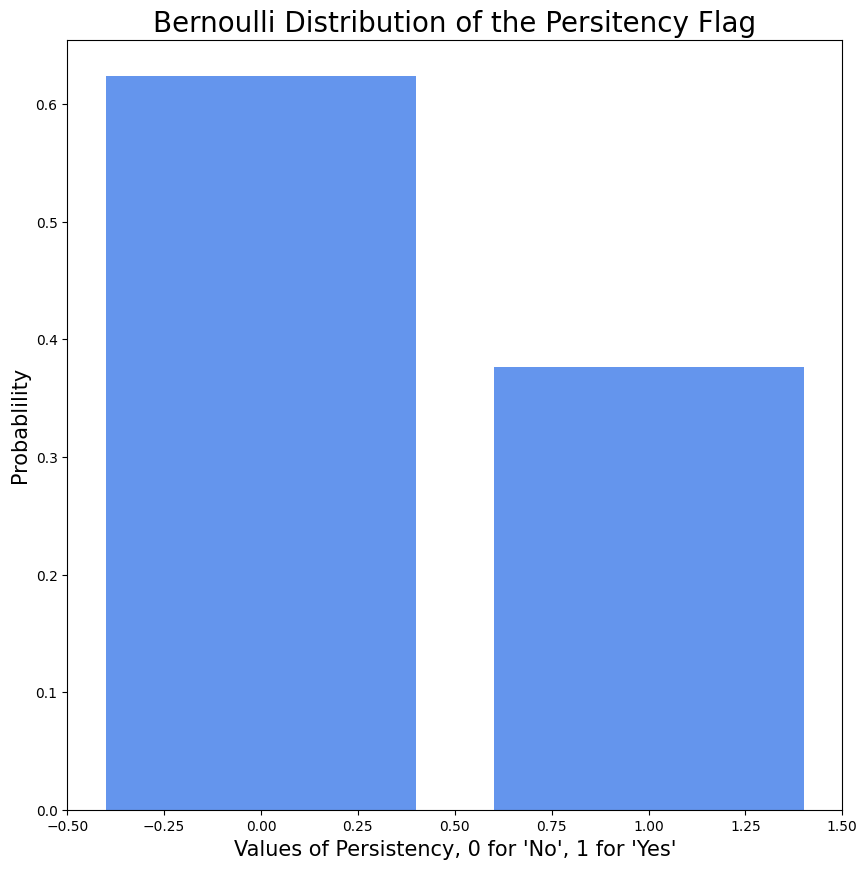

In [174]:
# Persistency Flag
from scipy.stats import bernoulli
pval_persistency_flag = (df.Persistency_Flag.value_counts()[1])/df.Persistency_Flag.count()
pval_persistency_flag

bd_persistency = bernoulli(pval_persistency_flag)
x = [0,1]


plt.figure(figsize = (10,10))
plt.xlim(-0.5,1.5)
plt.bar(x, bd_persistency.pmf(x), color = 'cornflowerblue')

plt.title("Bernoulli Distribution of the Persitency Flag", fontsize = '20')
plt.xlabel("Values of Persistency, 0 for 'No', 1 for 'Yes'", fontsize= '15')
plt.ylabel("Probablility", fontsize = '15')

In [175]:
corr = df.corr()
corr

## Large correlation dataframe, will create smaller correlation heatmaps with persistency flag being common between them.

,Persistency_Flag,Gender,Race,Region,Age,NTM_Physician_Speciality,NTM_Specialist_Flag,Glucocorticoids_Record_Before_NTM,Glucocorticoids_Record_During_prescription,DEXA_Scan_Freq_During_Prescription,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Risk_Count
Persistency_Flag,1.000000,0.010343,0.047116,0.093888,-0.003215,0.093888,0.139387,-0.005758,0.212704,0.335235,...,-0.003492,-0.009920,0.079782,-0.045277,-0.040138,-0.016106,-0.012155,-0.049787,-0.021345,0.082210
Gender,0.010343,1.000000,0.001378,0.019542,0.018061,0.019542,0.010406,0.024992,-0.003173,-0.022068,...,-0.021815,-0.027311,-0.032103,0.006158,0.001859,-0.031023,-0.013913,0.004093,0.036774,0.002931
Race,0.047116,0.001378,1.000000,0.067129,-0.011134,0.067129,-0.051851,-0.035596,-0.038181,0.024196,...,-0.012554,-0.001645,-0.020331,-0.018431,-0.010168,-0.000421,0.002083,0.002351,0.031301,-0.047998
Region,0.093888,0.019542,0.067129,1.000000,0.006321,1.000000,0.088709,-0.003675,0.018615,0.069207,...,0.064990,0.011209,0.064942,-0.005400,0.026268,0.013856,-0.040233,-0.022293,-0.016001,0.074534
Age,-0.003215,0.018061,-0.011134,0.006321,1.000000,0.006321,-0.059544,0.034452,0.022778,0.012048,...,-0.067324,-0.025311,-0.004219,0.020077,0.011951,-0.060372,-0.018680,0.013034,0.050989,-0.031058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Risk_Hysterectomy_Oophorectomy,-0.016106,-0.031023,-0.000421,0.013856,-0.060372,0.013856,-0.001205,-0.020429,-0.001200,0.000614,...,0.002712,-0.014107,0.024397,0.009903,0.015965,1.000000,-0.007186,0.028624,-0.001471,0.141469
Risk_Estrogen_Deficiency,-0.012155,-0.013913,0.002083,-0.040233,-0.018680,-0.040233,0.025867,-0.007134,-0.010519,0.013845,...,-0.019399,-0.006327,-0.012976,-0.013837,-0.008020,-0.007186,1.000000,-0.003638,-0.008142,0.077153
Risk_Immobilization,-0.049787,0.004093,0.002351,-0.022293,0.013034,-0.022293,-0.016451,-0.003146,-0.007149,-0.017566,...,-0.021895,-0.007140,-0.024640,0.262889,-0.009052,0.028624,-0.003638,1.000000,0.023381,0.098860
Risk_Recurring_Falls,-0.021345,0.036774,0.031301,-0.016001,0.050989,-0.016001,0.023502,-0.001089,0.008602,0.000994,...,0.025714,0.002901,0.020936,0.046352,0.084778,-0.001471,-0.008142,0.023381,1.000000,0.186956


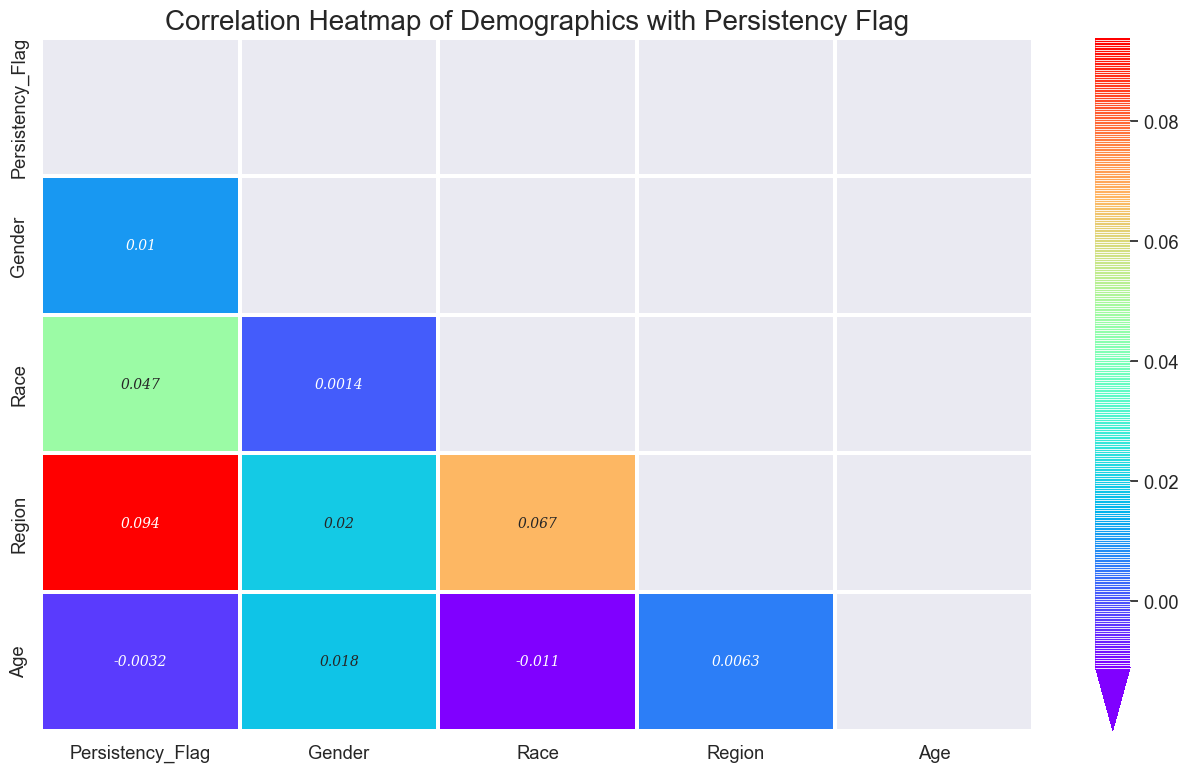

In [178]:
# Demographics heatmap

df_demo = df[['Persistency_Flag', 'Gender', 'Race', 'Region', 'Age']].copy()
corr_demo = df_demo.corr()

plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(corr_demo)

# Generate heatmap correlation
ax = sns.heatmap(corr_demo, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of Demographics with Persistency Flag', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

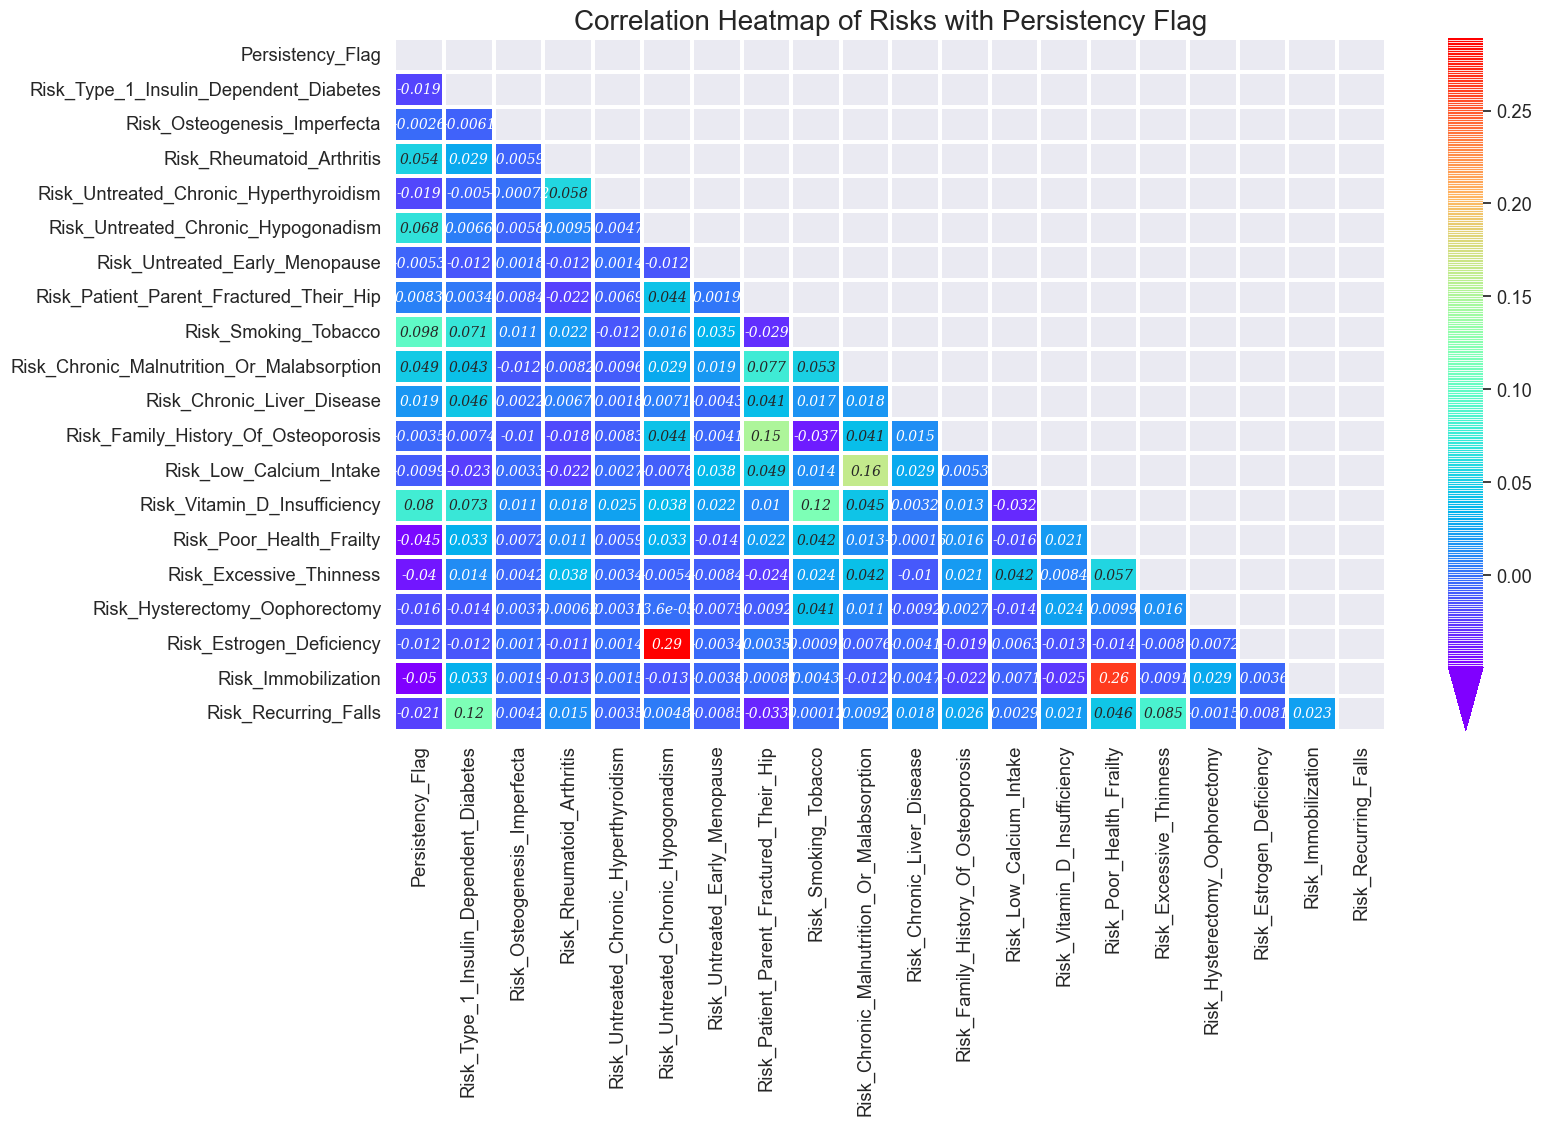

In [271]:
# Risks and Persistency Heatmap sans Total Risk count
df_risk = df[['Persistency_Flag', 'Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 
             'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism',
             'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco',
             'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis',
             'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency', 'Risk_Poor_Health_Frailty','Risk_Excessive_Thinness',
             'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 'Risk_Recurring_Falls']].copy()
corr_risk = df_risk.corr()

plt.figure(figsize = (16, 9))

# take upper correlation matrix
matrix = np.triu(corr_risk)

# Generate heatmap correlation
ax = sns.heatmap(corr_risk, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of Risks with Persistency Flag', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

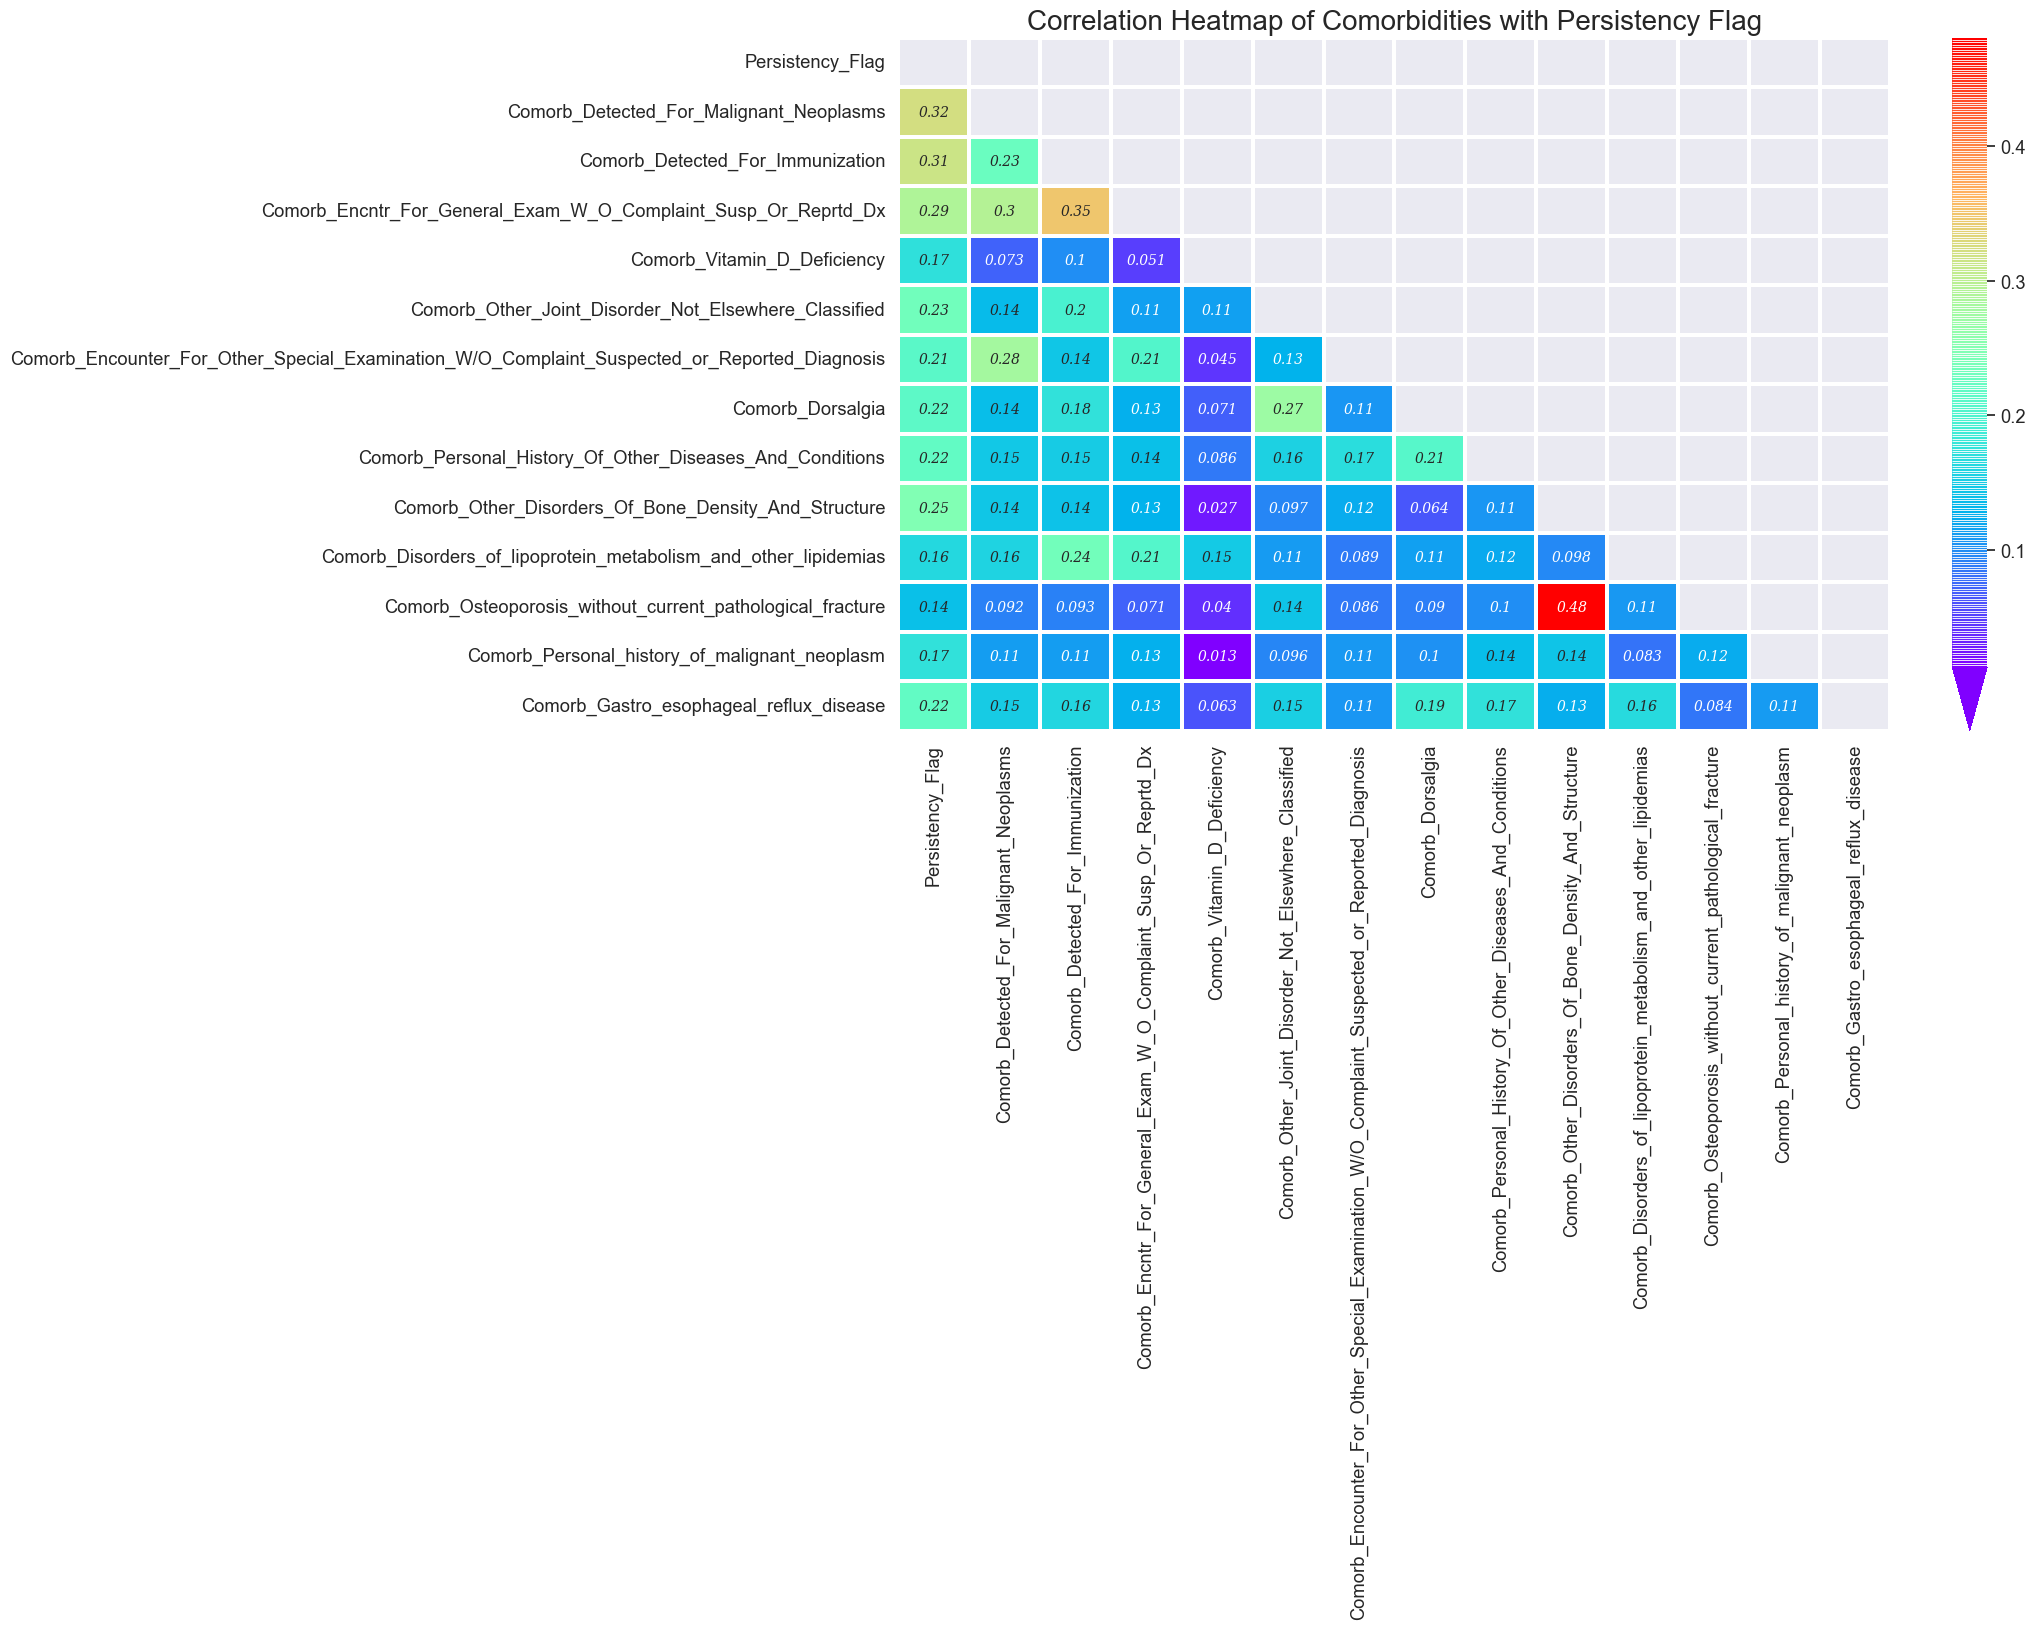

In [272]:
# Comorbidities and Persistency Heatmap
df_comorb = df[['Persistency_Flag', 'Comorb_Detected_For_Malignant_Neoplasms', 'Comorb_Detected_For_Immunization', 
             'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 
             'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
             'Comorb_Encounter_For_Other_Special_Examination_W/O_Complaint_Suspected_or_Reported_Diagnosis', 
             'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
             'Comorb_Other_Disorders_Of_Bone_Density_And_Structure', 
             'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', 
             'Comorb_Osteoporosis_without_current_pathological_fracture',
             'Comorb_Personal_history_of_malignant_neoplasm', 'Comorb_Gastro_esophageal_reflux_disease']].copy()
corr_comorb = df_comorb.corr()


plt.figure(figsize = (16, 9))

# take upper correlation matrix
matrix = np.triu(corr_comorb)

# Generate heatmap correlation
ax = sns.heatmap(corr_comorb, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of Comorbidities with Persistency Flag', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

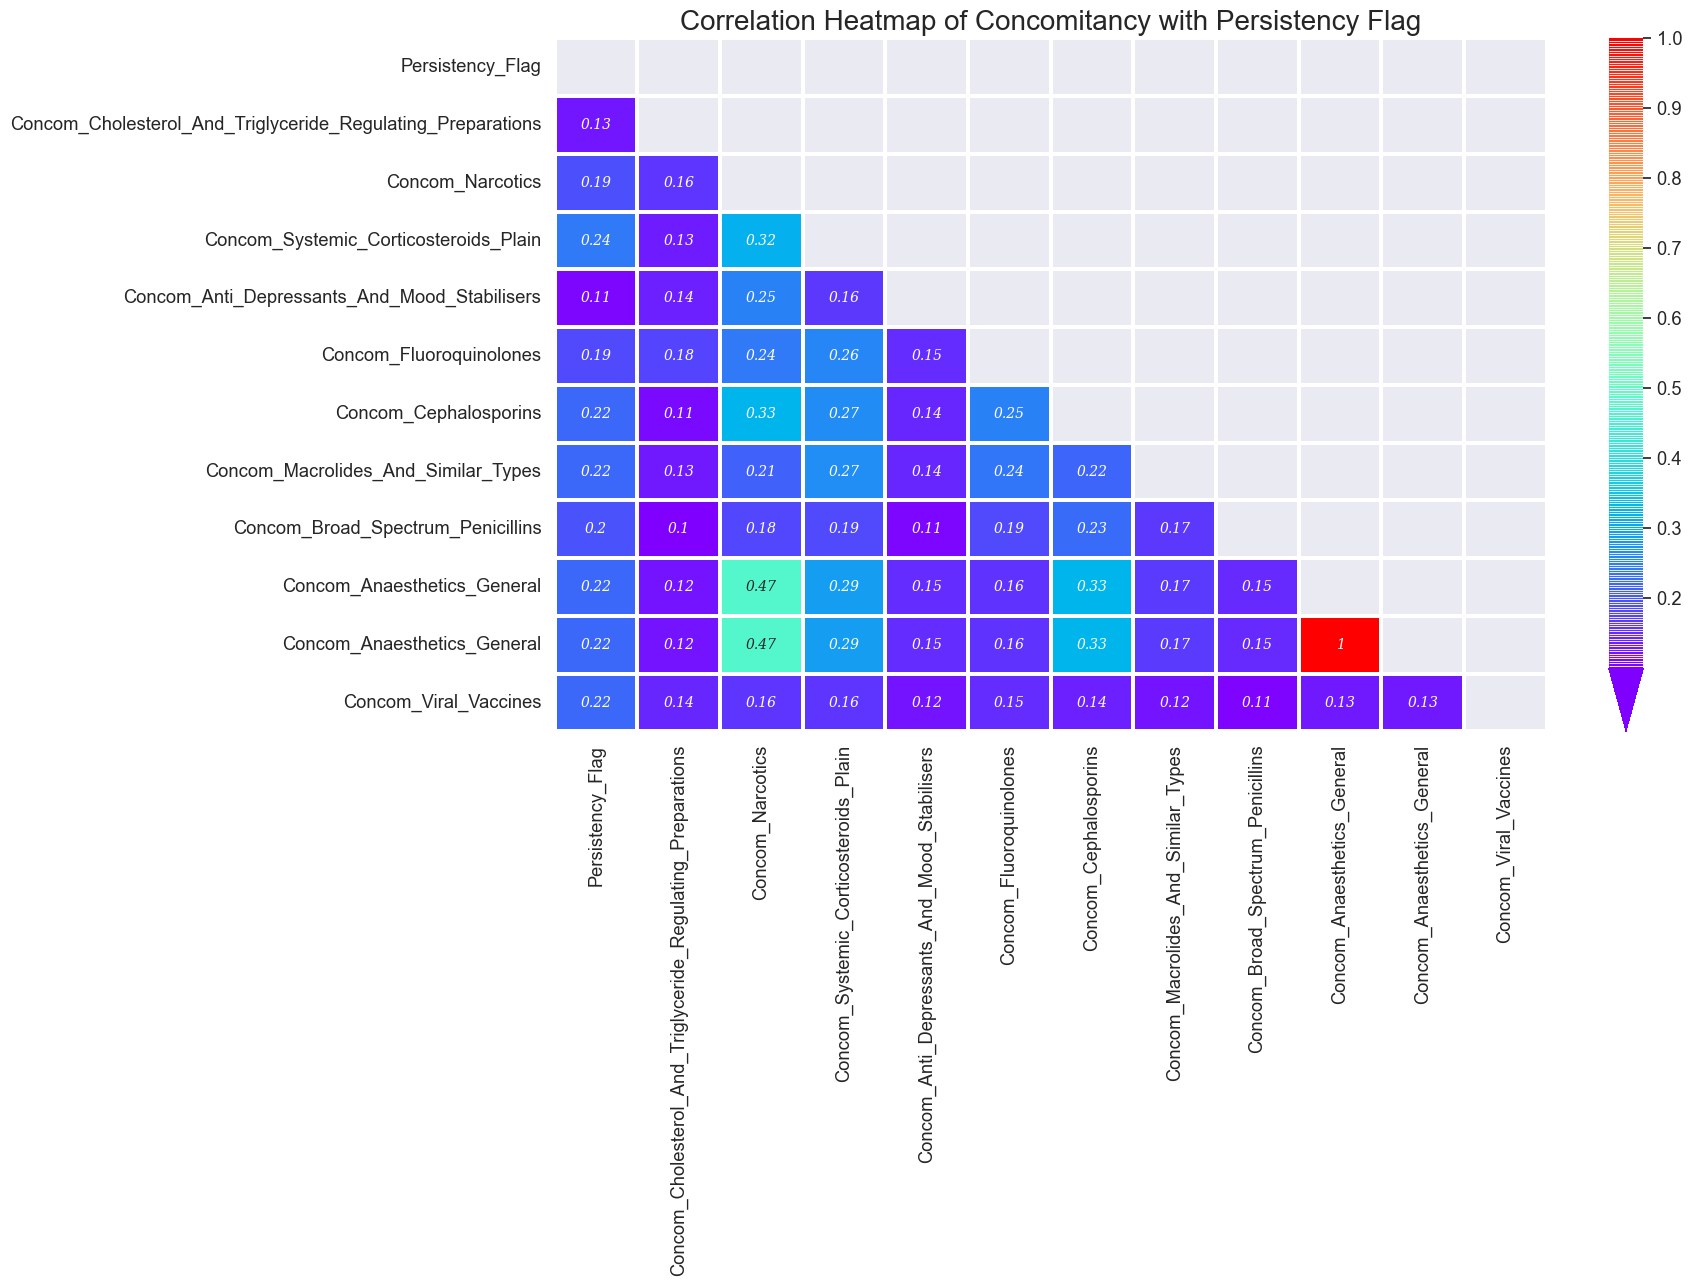

In [273]:
# Concomitancy and Persistency Heatmap
df_concom = df[['Persistency_Flag', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations', 
                'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain', 
                'Concom_Anti_Depressants_And_Mood_Stabilisers', 'Concom_Fluoroquinolones','Concom_Cephalosporins', 
                'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 
                'Concom_Anaesthetics_General', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines']].copy()
corr_concom = df_concom.corr()

plt.figure(figsize = (16, 9))

# take upper correlation matrix
matrix = np.triu(corr_concom)

# Generate heatmap correlation
ax = sns.heatmap(corr_concom, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of Concomitancy with Persistency Flag', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

/var/folders/0y/g25922wd2733pq5dntsdzf940000gr/T/ipykernel_60841/265715705.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ntm = df_ntm.corr()


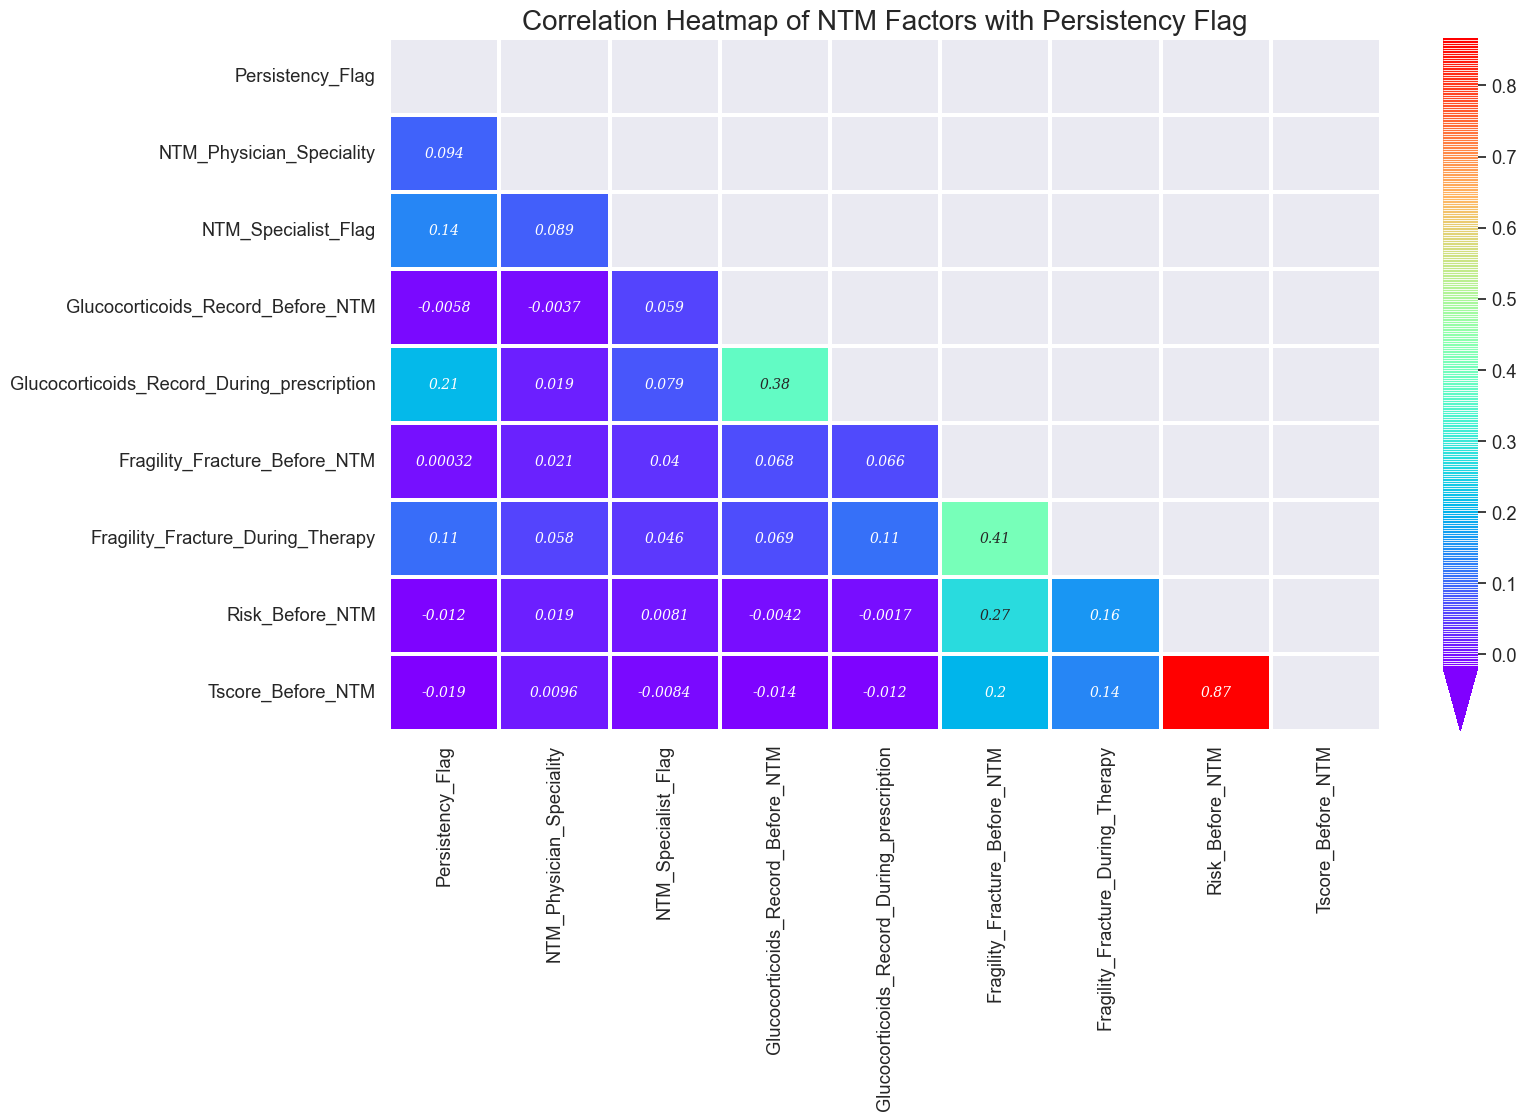

In [274]:
# Heatmap of Persistency Flag and NTM Factors
df_ntm = df[['Persistency_Flag', 'NTM_Physician_Speciality', 'NTM_Specialist_Flag', 
             'Glucocorticoids_Record_Before_NTM', 'Glucocorticoids_Record_During_prescription', 
             'Fragility_Fracture_Before_NTM','Fragility_Fracture_During_Therapy', 'Risk_Before_NTM', 
             'Tscore_Before_NTM', 'Risk_During_Prescription', 'Tscore_During_Prescription', 
             'Change_T_Score', 'Risk_Change']].copy()
corr_ntm = df_ntm.corr()

plt.figure(figsize = (16, 9))

# take upper correlation matrix
matrix = np.triu(corr_ntm)

# Generate heatmap correlation
ax = sns.heatmap(corr_ntm, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of NTM Factors with Persistency Flag', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

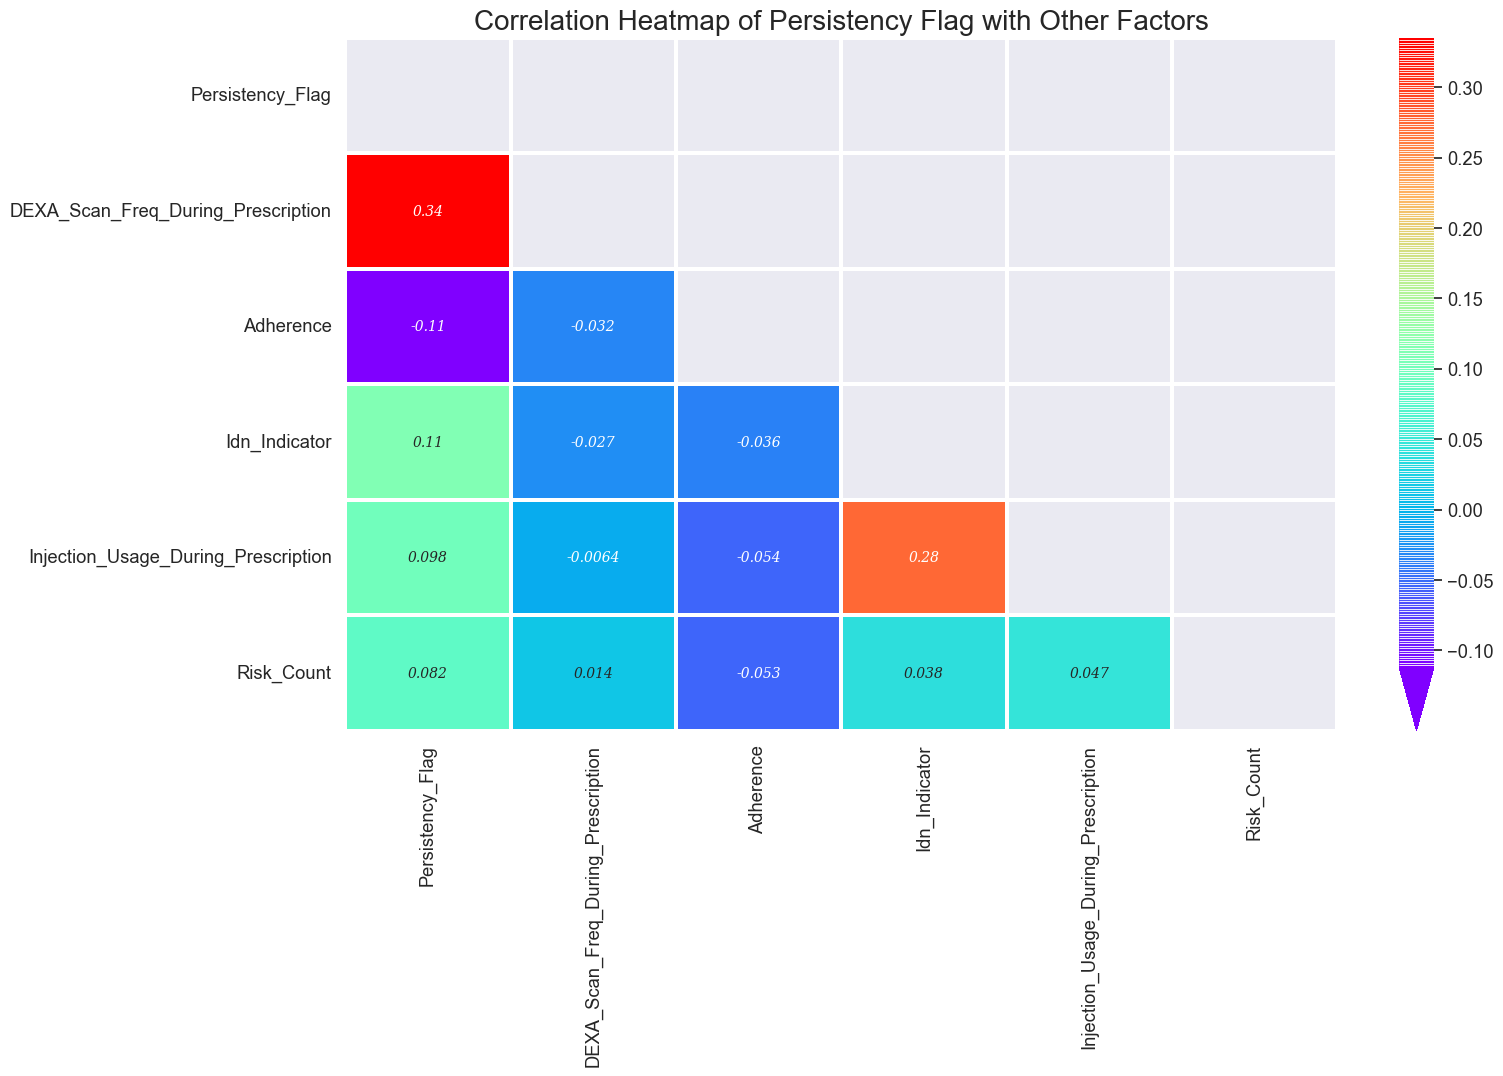

In [277]:
# Heatmap of Persistency Flag and Other factors
# Am not including 'Race Encoder' as race is already counted above.
df_other = df[['Persistency_Flag', 'DEXA_Scan_Freq_During_Prescription', 'Adherence',
               'Idn_Indicator', 'Injection_Usage_During_Prescription', 'Risk_Count']].copy()
corr_other = df_other.corr()

plt.figure(figsize = (16, 9))

# take upper correlation matrix
matrix = np.triu(corr_other)

# Generate heatmap correlation
ax = sns.heatmap(corr_other, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of Persistency Flag with Other Factors', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

In [ ]:
import klib #Tahsin

<AxesSubplot:xlabel='Age', ylabel='Density'>

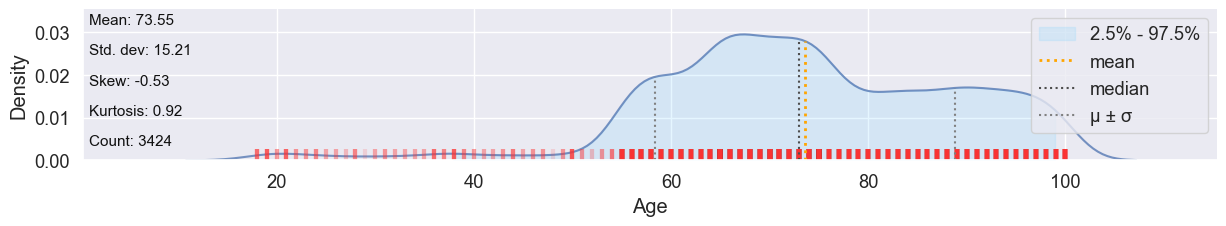

In [361]:
#Age distribution
klib.dist_plot(df['Age'])

In [213]:
comorb_data = df[['Persistency_Flag','Comorb_Detected_For_Malignant_Neoplasms',
       'Comorb_Detected_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encounter_For_Other_Special_Examination_W/O_Complaint_Suspected_or_Reported_Diagnosis',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease',]]
concom_data = df[['Persistency_Flag','Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Anti_Depressants_And_Mood_Stabilisers',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines',]]
risk_data = df[['Persistency_Flag','Risk_Type_1_Insulin_Dependent_Diabetes',
       'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis',
       'Risk_Untreated_Chronic_Hyperthyroidism',
       'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause',
       'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
       'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis',
       'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency',
       'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness',
       'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency',
       'Risk_Immobilization', 'Risk_Recurring_Falls', 'Risk_Count']]

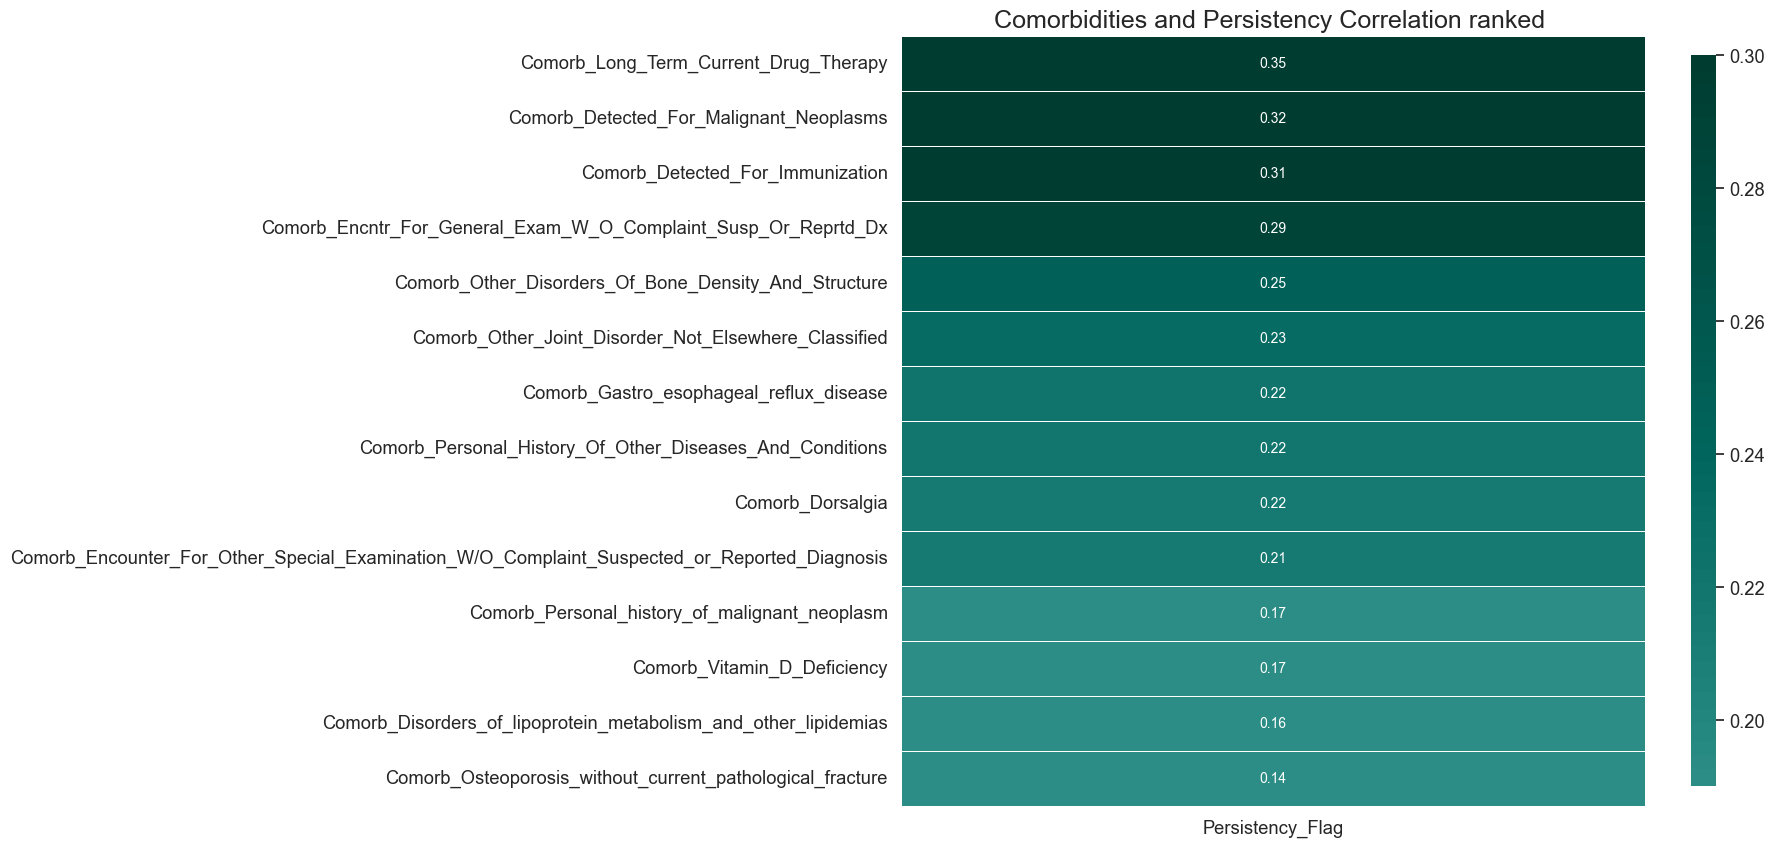

In [235]:
#A cleaner look at the correlation of features against Persistency, ranked
ax= klib.corr_plot(comorb_data, target= 'Persistency_Flag')
ax.title.set_text('Comorbidities and Persistency Correlation ranked ')

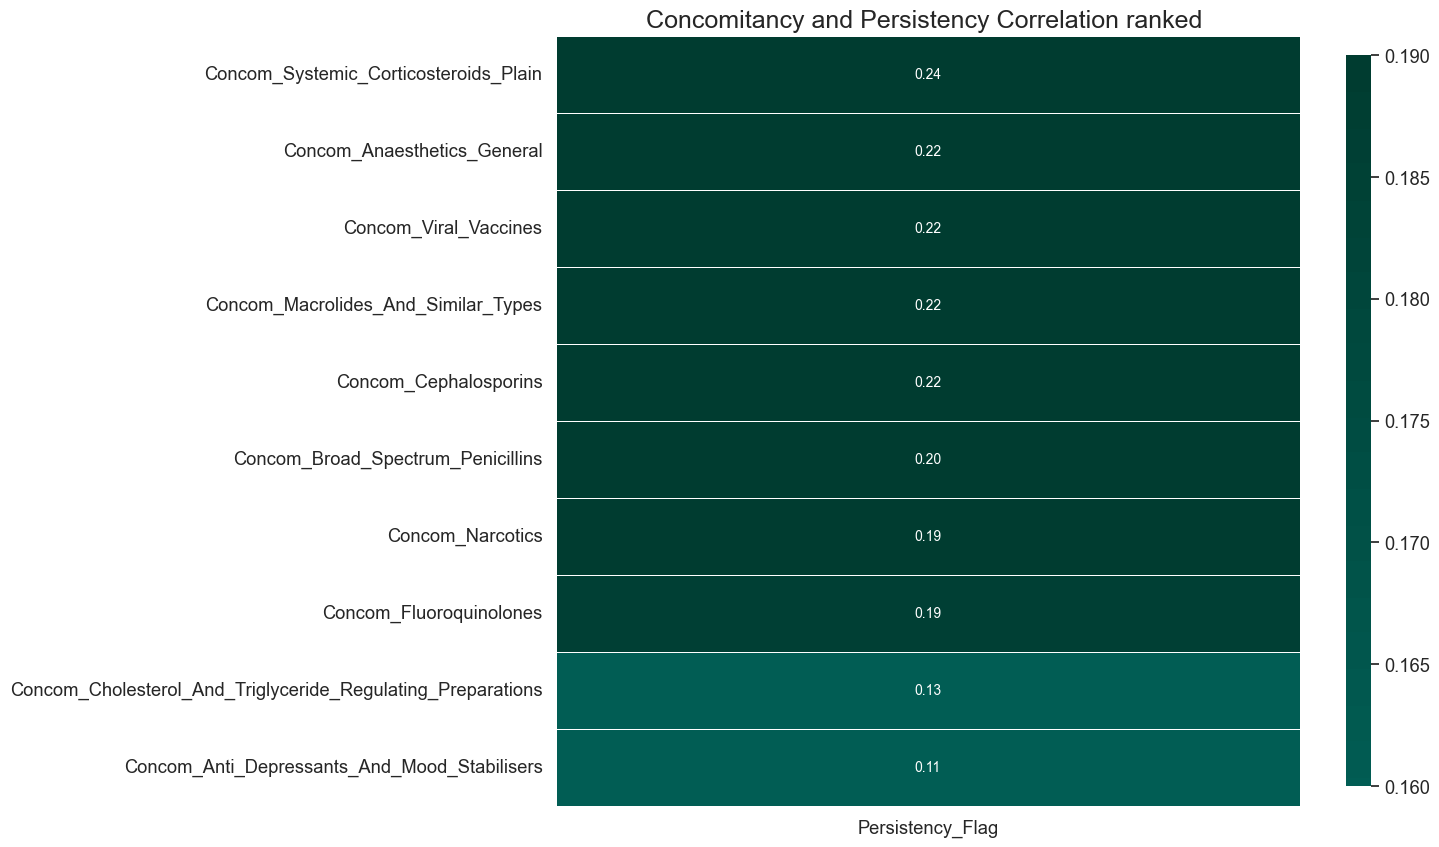

In [238]:
ax1 = klib.corr_plot(concom_data, target= 'Persistency_Flag')
ax1.title.set_text('Concomitancy and Persistency Correlation ranked ')

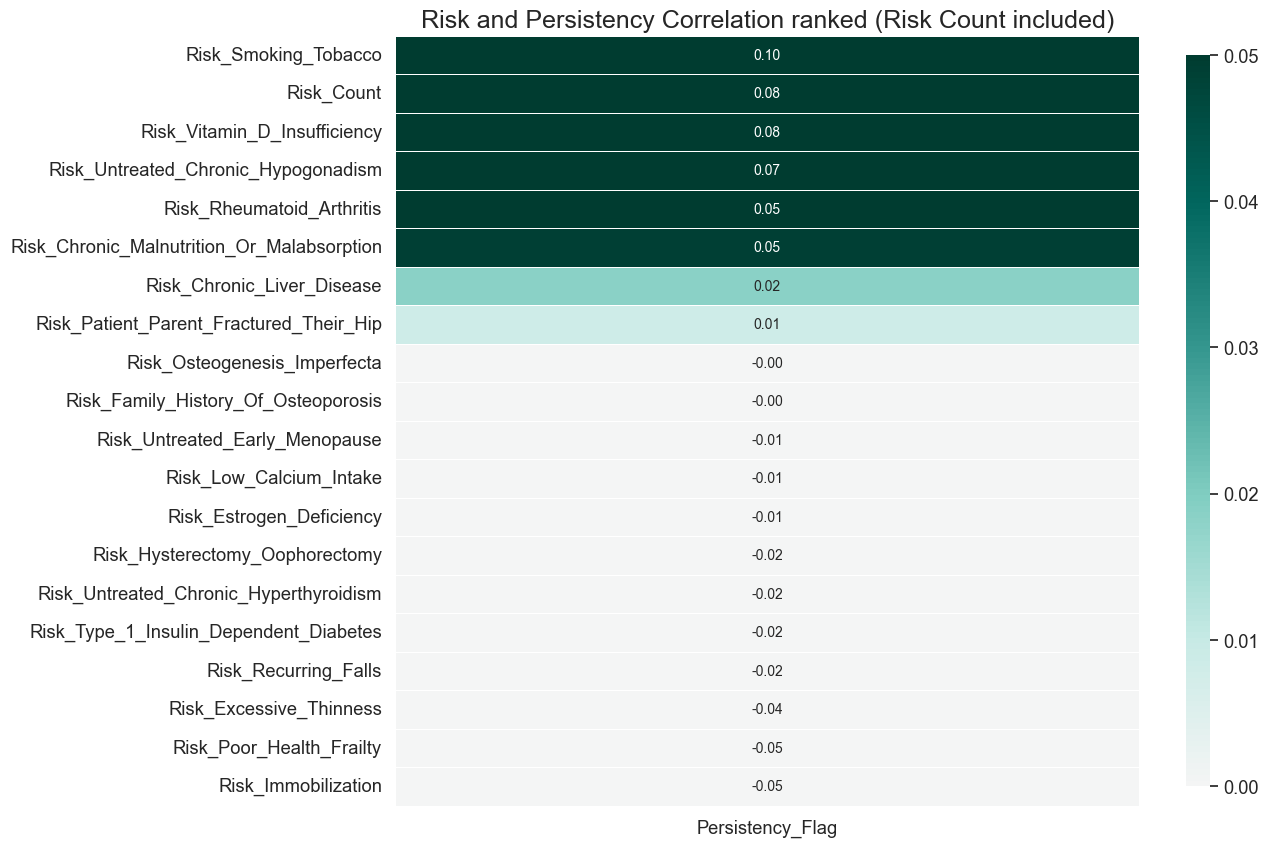

In [327]:
ax2 = klib.corr_plot(risk_data, target= 'Persistency_Flag')
ax2.title.set_text('Risk and Persistency Correlation ranked (Risk Count included)')

<AxesSubplot:>

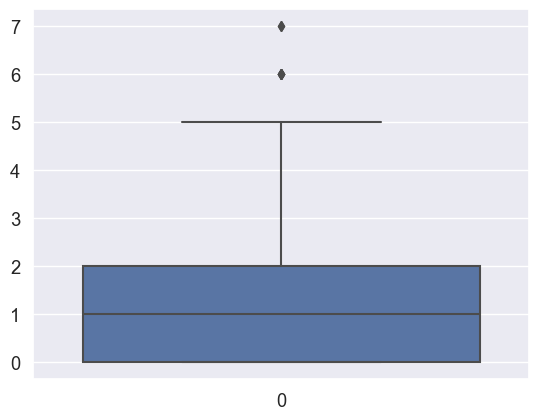

In [289]:
#Boxplot shows outliers in risk count
sns.boxplot(data=df1['Risk_Count'])